In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names, get_histplot
import seaborn as sns

In [2]:
# get the col reference table
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')

In [3]:
print(get_file_names(['IDEHR', 'EHRType', 'chk_stato_danimo'], df_ref))    # mood
print(get_file_names(['IDEHR', 'EHRType', 'stato_danimo'], df_ref))    # mood

['wH_DirectTable_VISITA_MED_VIDAS', 'wH_DirectTable_C_VISITA_MED_VIDAS']
['wH_DirectTable_VISITA_OSS_VIDAS', 'wH_DirectTable_C_VISITA_OSS_VIDAS']


In [4]:
df_referral = pd.read_csv('./vidas_data/survival_time.csv', parse_dates=['EOH', 'SOH'])
print(df_referral.shape)
df_referral.head()

(5546, 7)


IDEHR                 EOH EHRType                     SOH  \
0   3263 2015-10-02 07:50:00     AMB 2015-09-21 10:00:18.743   
1   1414 2015-10-05 11:50:00     EHR 2015-10-02 15:45:06.800   
2   3394 2015-10-06 03:25:00     AMB 2015-09-25 18:17:56.940   
3   3417 2015-10-05 15:00:00     AMB 2015-09-28 17:26:59.413   
4   2977 2015-10-06 06:00:00     AMB 2015-09-08 11:26:31.850   

   survival_time_days                   Diagnosis  Diag_Ref  
0                10.0               Liver-Biliary      1550  
1                 2.0            Myeloid Leukemia     28983  
2                10.0                        Lung      1629  
3                 6.0                        Skin      1739  
4                27.0  Palliative (Non-Malignant)         1

In [5]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_MED_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
df_obs.shape

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16,17,18,19,20,21,22,50,97,98,100,116,142) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(57007, 175)

No. of unique IDEHR:  3388


<Figure size 1080x576 with 0 Axes>

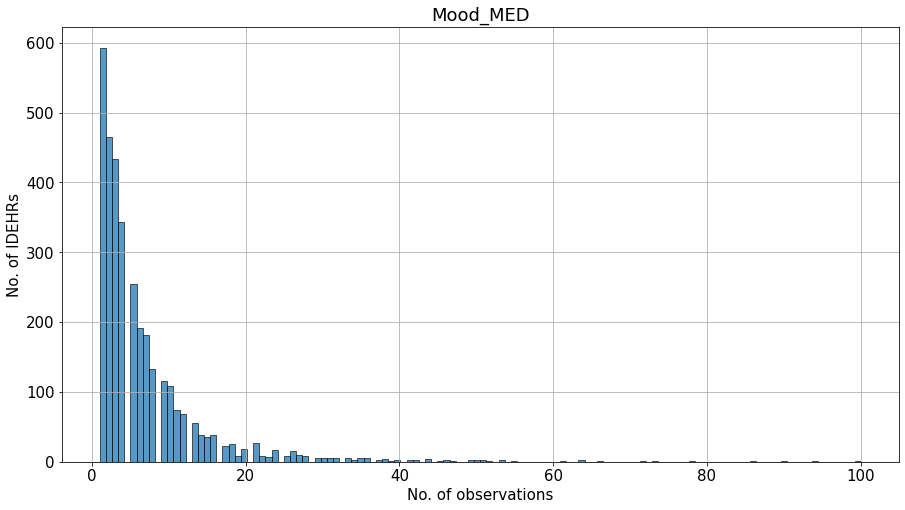

In [6]:
# plot the distribution of entries 
get_histplot('chk_stato_danimo', df_obs, 'Mood_MED')

In [7]:
mood_med = df_obs[['IDEHR', 'chk_stato_danimo']].dropna().IDEHR.value_counts().values
mood_med

array([100,  94,  90, ...,   1,   1,   1], dtype=int64)

In [8]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_OSS_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
df_obs.shape

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (21,22,26,27,28,31,48,51,58,72,82,83,90,93,98,99,116,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(68649, 136)

No. of unique IDEHR:  1922


<Figure size 1080x576 with 0 Axes>

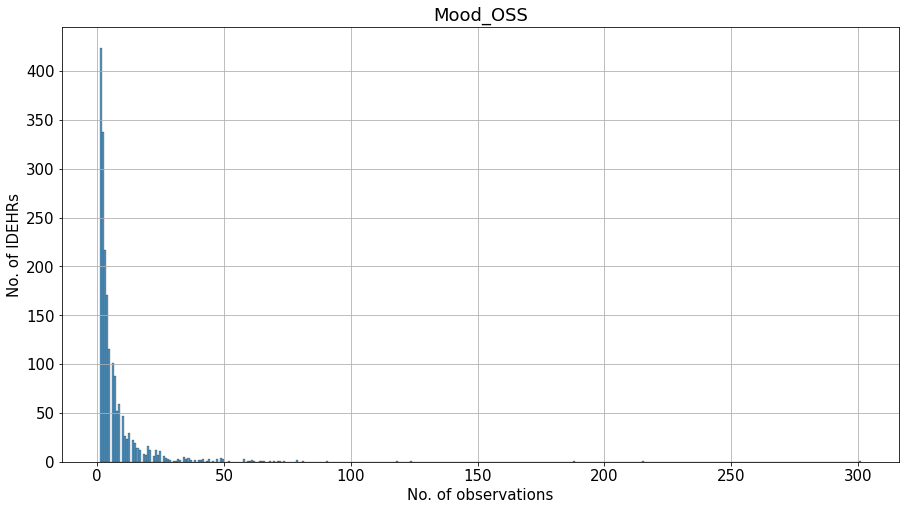

In [9]:
get_histplot('stato_danimo', df_obs, 'Mood_OSS')

In [10]:
mood_oss = df_obs[['IDEHR', 'stato_danimo']].dropna().IDEHR.value_counts().values
mood_oss

array([301, 215, 188, ...,   1,   1,   1], dtype=int64)

In [11]:
print(get_file_names(['IDEHR', 'EHRType', 'Stato_animo'], df_ref))

['wH_DirectTable_VISITA_INF_VIDAS', 'wH_DirectTable_C_VISITA_INF_VIDAS', 'wH_DirectTable_XX_VISITA_INF_VIDAS']


C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,19,20,21,22,23,24,85,162,163,164,165,166,167,168) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(113250, 175)
No. of unique IDEHR:  4839


<Figure size 1080x576 with 0 Axes>

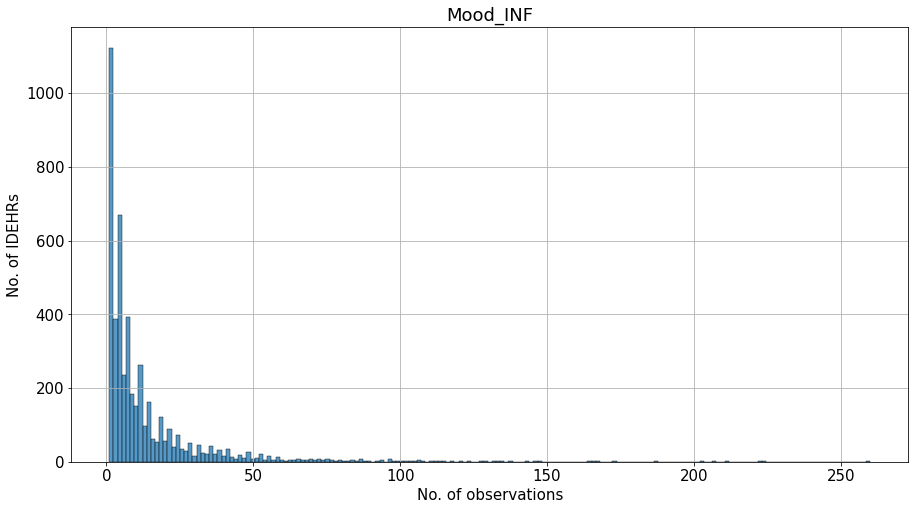

In [12]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_INF_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
print(df_obs.shape)
mood_inf = df_obs[['IDEHR', 'Stato_animo']].dropna().IDEHR.value_counts().values
get_histplot('Stato_animo', df_obs, 'Mood_INF')

In [13]:
# with pd.option_context("display.max_rows", 1000):
#     print(df_obs[['IDEHR', 'chk_stato_danimo']].dropna().loc[df_obs['IDEHR'] == 6762])

In [14]:
# pain relief
print(get_file_names(['IDEHR', 'EHRType', 'Sollievo_dolore'], df_ref))

['wH_DirectTable_DOLORE_MED_e_INF_VIDAS', 'wH_DirectTable_C_DOLORE_MED_e_INF_VIDAS']


(154908, 27)
No. of unique IDEHR:  3079


<Figure size 1080x576 with 0 Axes>

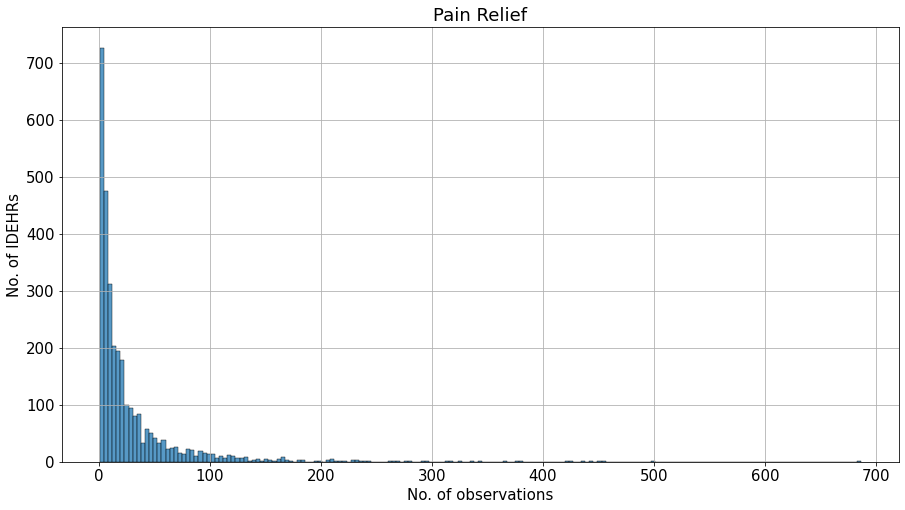

In [15]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_DOLORE_MED_e_INF_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
print(df_obs.shape)
pain = df_obs[['IDEHR', 'Sollievo_dolore']].dropna().IDEHR.value_counts().values
get_histplot('Sollievo_dolore', df_obs, 'Pain Relief')

In [16]:
# collaboration
print(get_file_names(['IDEHR', 'EHRType', 'opt_collaborazione'], df_ref))

['wH_DirectTable_VISITA_OSS_VIDAS', 'wH_DirectTable_C_VISITA_OSS_VIDAS']


C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (21,22,26,27,28,31,48,51,58,72,82,83,90,93,98,99,116,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(68649, 136)
No. of unique IDEHR:  2866


<Figure size 1080x576 with 0 Axes>

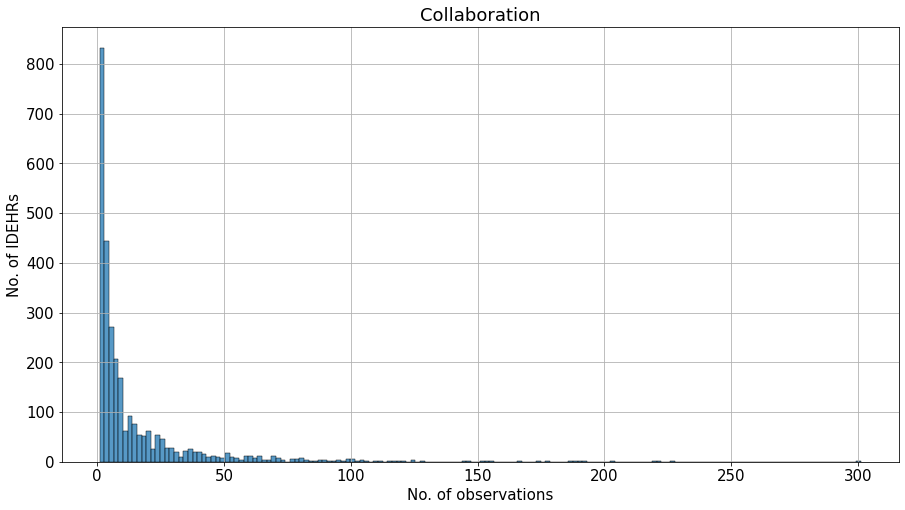

In [17]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_OSS_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
print(df_obs.shape)
collab = df_obs[['IDEHR', 'opt_collaborazione']].dropna().IDEHR.value_counts().values
get_histplot('opt_collaborazione', df_obs, 'Collaboration')

In [18]:
# attitude
print(get_file_names(['IDEHR', 'EHRType', 'opt_atteggiamento'], df_ref))

['wH_DirectTable_VISITA_FKT_VIDAS', 'wH_DirectTable_C_VISITA_FKT_VIDAS']


(4525, 57)
No. of unique IDEHR:  1086


<Figure size 1080x576 with 0 Axes>

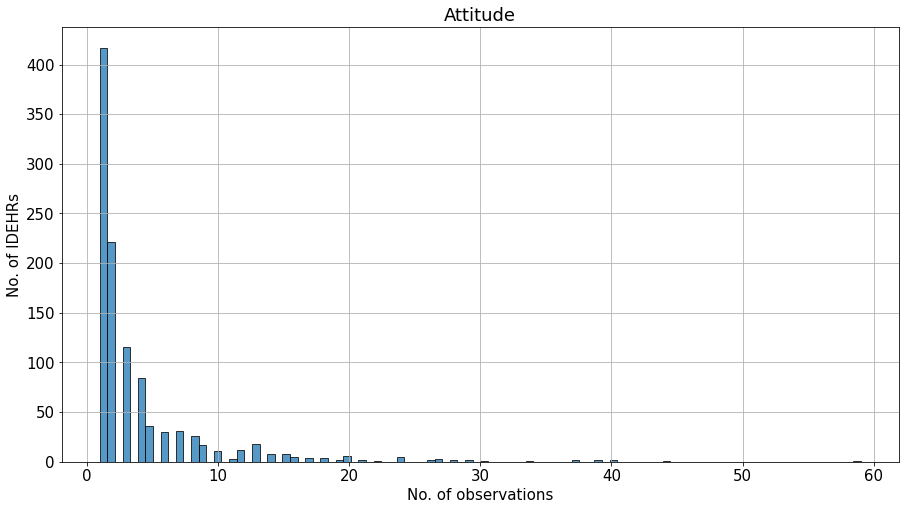

In [19]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_FKT_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
print(df_obs.shape)

att = df_obs[['IDEHR', 'opt_atteggiamento']].dropna().IDEHR.value_counts().values
get_histplot('opt_atteggiamento', df_obs, 'Attitude')

In [20]:
print(get_file_names(['IDEHR', 'EHRType', 'opt_depressione'], df_ref))

['wH_DirectTable_C_Scala_ESAS', 'wH_DirectTable_Scala_ESAS']


<Figure size 1080x720 with 0 Axes>

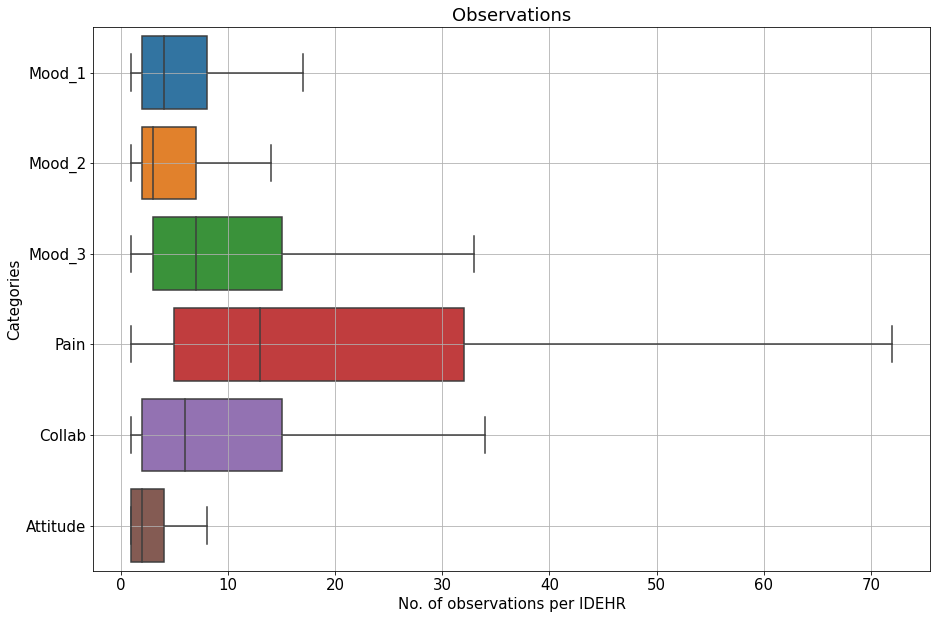

In [21]:
# box plots for observations across multiple categories
plt.rcParams['figure.figsize'] = [15, 10]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
ax = sns.boxplot(data=[mood_med, mood_oss, mood_inf, pain, collab, att], orient='h', showfliers=False)
ax.set_yticklabels(['Mood_1', 'Mood_2', 'Mood_3', 'Pain', 'Collab', 'Attitude'])
ax.set_title('Observations')
ax.set_xlabel('No. of observations per IDEHR')
ax.set_ylabel('Categories')
plt.grid()
plt.savefig("./graphs/referral analysis/observations_boxplot.png", bbox_inches='tight')
plt.show()

In [22]:
# Mood Analysis
df_referral.head()

IDEHR                 EOH EHRType                     SOH  \
0   3263 2015-10-02 07:50:00     AMB 2015-09-21 10:00:18.743   
1   1414 2015-10-05 11:50:00     EHR 2015-10-02 15:45:06.800   
2   3394 2015-10-06 03:25:00     AMB 2015-09-25 18:17:56.940   
3   3417 2015-10-05 15:00:00     AMB 2015-09-28 17:26:59.413   
4   2977 2015-10-06 06:00:00     AMB 2015-09-08 11:26:31.850   

   survival_time_days                   Diagnosis  Diag_Ref  
0                10.0               Liver-Biliary      1550  
1                 2.0            Myeloid Leukemia     28983  
2                10.0                        Lung      1629  
3                 6.0                        Skin      1739  
4                27.0  Palliative (Non-Malignant)         1

In [23]:
# mood dfs
df_mood1 = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_MED_VIDAS.csv', parse_dates=['TimeStamp_Insert'])
df_mood2 = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_OSS_VIDAS.csv', parse_dates=['TimeStamp_Insert'])
df_mood3 = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_INF_VIDAS.csv', parse_dates=['TimeStamp_Insert'])
print(df_mood1.shape, df_mood2.shape, df_mood3.shape)

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16,17,18,19,20,21,22,50,97,98,100,116,142) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (21,22,26,27,28,31,48,51,58,72,82,83,90,93,98,99,116,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,19,20,21,22,23,24,85,162,163,164,165,166,167,168) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(95044, 170) (111943, 131) (183321, 170)


In [24]:
df_mood1 = df_mood1[['IDEHR', 'EHRType', 'TimeStamp_Insert', 'chk_stato_danimo']].dropna().rename(columns={'chk_stato_danimo': 'mood'})
df_mood2 = df_mood2[['IDEHR', 'EHRType', 'TimeStamp_Insert', 'stato_danimo']].dropna().rename(columns={'stato_danimo': 'mood'})
df_mood3 = df_mood3[['IDEHR', 'EHRType', 'TimeStamp_Insert', 'Stato_animo']].dropna().rename(columns={'Stato_animo': 'mood'})
print(df_mood1.shape, df_mood2.shape, df_mood3.shape)

(36300, 4) (22660, 4) (106079, 4)


In [8]:
df_mood1.head()

IDEHR EHRType        TimeStamp_Insert                 mood
0     15     EHR 2015-01-12 11:11:44.807      irritabilità#05
1     11     EHR 2015-01-12 11:16:03.327             paura#08
2     16     EHR 2015-01-12 11:40:00.510            apatia#00
3     16     EHR 2015-01-12 11:42:15.270            apatia#00
5      2     EHR 2015-01-13 10:18:22.327  demoralizzazione#03

In [9]:
df_mood2.head()

IDEHR EHRType        TimeStamp_Insert  \
1       2     EHR 2015-01-12 10:49:20.557   
4       7     EHR 2015-01-12 11:05:00.283   
5      15     EHR 2015-01-12 11:12:23.963   
8       8     EHR 2015-01-12 11:45:12.140   
10     16     EHR 2015-01-12 11:59:27.663   

                                                 mood  
1                                           apatia#00  
4   demoralizzazione#03;irritabilità#05;senso d'im...  
5                                            paura#08  
8                                            paura#08  
10                                           paura#08

In [10]:
df_mood3.head()

IDEHR EHRType        TimeStamp_Insert                          mood
0      5     EHR 2015-01-12 08:10:10.123                  tristezza#11
1     14     EHR 2015-01-12 08:15:38.187                  tristezza#11
2      2     EHR 2015-01-12 08:26:21.210  disperazione#04;tristezza#11
6   1020     EHR 2015-01-12 08:58:58.027                  tristezza#11
7     11     EHR 2015-01-12 09:04:35.010                      paura#08

In [11]:
# df_mood1.mood.unique()

In [12]:
# df_mood2.mood.unique()

In [13]:
# df_mood3.mood.unique()

In [14]:
# concatenate the dframes and group by IDEHRs
df_mood = pd.concat([df_mood1, df_mood2, df_mood3])
df_mood.shape

(165039, 4)

In [15]:
# merge with referral
df_ma = pd.merge(df_mood, df_referral, on=['IDEHR', 'EHRType'], how='outer').dropna().sort_values(by=['IDEHR', 'TimeStamp_Insert'], ascending=[True, True]).reset_index(drop=True)

In [16]:
df_ma

IDEHR EHRType        TimeStamp_Insert  \
0        1382     EHR 2015-10-06 11:20:09.030   
1        1382     EHR 2015-10-06 13:08:33.307   
2        1382     EHR 2015-10-06 17:51:06.480   
3        1382     EHR 2015-10-07 05:20:13.373   
4        1382     EHR 2015-10-07 11:12:16.007   
...       ...     ...                     ...   
101240  29399     AMB 2020-07-21 11:31:32.567   
101241  29411     AMB 2020-07-17 18:59:35.257   
101242  29411     AMB 2020-07-19 12:04:33.460   
101243  29440     AMB 2020-07-21 11:27:09.957   
101244  29440     AMB 2020-07-23 09:42:34.347   

                                                mood                 EOH  \
0                           chiusura in se stesso#01 2015-10-27 08:25:00   
1                           chiusura in se stesso#01 2015-10-27 08:25:00   
2                           chiusura in se stesso#01 2015-10-27 08:25:00   
3                           chiusura in se stesso#01 2015-10-27 08:25:00   
4                           chiusura in se stesso#01 2015-10-27 08:25:00   
...                                              ...                 ...   
101240                          senso d'impotenza#10 2020-07-23 00:00:21   
101241                            paura#08;rabbia#09 2020-07-19 13:00:44   
101242                                      paura#08 2020-07-19 13:00:44   
101243  chiusura in se stesso#01;demoralizzazione#03 2020-07-23 15:36:43   
101244  chiusura in se stesso#01;demoralizzazione#03 2020-07-23 15:36:43   

                           SOH  survival_time_days  \
0      2015-09-11 17:39:52.193                45.0   
1      2015-09-11 17:39:52.193                45.0   
2      2015-09-11 17:39:52.193                45.0   
3      2015-09-11 17:39:52.193                45.0   
4      2015-09-11 17:39:52.193                45.0   
...                        ...                 ...   
101240 2020-07-17 10:08:54.310                 5.0   
101241 2020-07-17 13:54:50.597                 1.0   
101242 2020-07-17 13:54:50.597                 1.0   
101243 2020-07-20 17:23:52.570                 2.0   
101244 2020-07-20 17:23:52.570                 2.0   

                         Diagnosis  Diag_Ref  
0       Palliative (Non-Malignant)     667.0  
1       Palliative (Non-Malignant)     667.0  
2       Palliative (Non-Malignant)     667.0  
3       Palliative (Non-Malignant)     667.0  
4       Palliative (Non-Malignant)     667.0  
...                            ...       ...  
101240                        Lung    1630.0  
101241                        Lung    1623.0  
101242                        Lung    1623.0  
101243                        Lung    1629.0  
101244                        Lung    1629.0  

[101245 rows x 9 columns]

In [17]:
df_ma['mood_num'] = df_ma.mood.str.findall('#(\d\d)').to_frame()
df_ma['mood_num'] = df_ma['mood_num'].apply(lambda x: np.nan if not x else [int(i) for i in x])
df_ma = df_ma.drop(columns=['mood', 'EOH', 'Diag_Ref'])
df_ma = df_ma.explode('mood_num')

In [18]:
df_ma

IDEHR EHRType        TimeStamp_Insert                     SOH  \
0        1382     EHR 2015-10-06 11:20:09.030 2015-09-11 17:39:52.193   
1        1382     EHR 2015-10-06 13:08:33.307 2015-09-11 17:39:52.193   
2        1382     EHR 2015-10-06 17:51:06.480 2015-09-11 17:39:52.193   
3        1382     EHR 2015-10-07 05:20:13.373 2015-09-11 17:39:52.193   
4        1382     EHR 2015-10-07 11:12:16.007 2015-09-11 17:39:52.193   
...       ...     ...                     ...                     ...   
101242  29411     AMB 2020-07-19 12:04:33.460 2020-07-17 13:54:50.597   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   

        survival_time_days                   Diagnosis mood_num  
0                     45.0  Palliative (Non-Malignant)        1  
1                     45.0  Palliative (Non-Malignant)        1  
2                     45.0  Palliative (Non-Malignant)        1  
3                     45.0  Palliative (Non-Malignant)        1  
4                     45.0  Palliative (Non-Malignant)        1  
...                    ...                         ...      ...  
101242                 1.0                        Lung        8  
101243                 2.0                        Lung        1  
101243                 2.0                        Lung        3  
101244                 2.0                        Lung        1  
101244                 2.0                        Lung        3  

[155546 rows x 7 columns]

In [19]:
# convert mood_num to mood_name
def conv_mood_num(df):
    df.loc[df['mood_num'] == 0, 'mood_num'] = 'apathy'
    df.loc[df['mood_num'] == 1, 'mood_num'] = 'closure in itself'
    df.loc[df['mood_num'] == 2, 'mood_num'] = 'delusion'
    df.loc[df['mood_num'] == 3, 'mood_num'] = 'demoralization'
    df.loc[df['mood_num'] == 4, 'mood_num'] = 'despair'
    df.loc[df['mood_num'] == 5, 'mood_num'] = 'irritability'
    df.loc[df['mood_num'] == 6, 'mood_num'] = 'denial'
    df.loc[df['mood_num'] == 7, 'mood_num'] = 'hostility'
    df.loc[df['mood_num'] == 8, 'mood_num'] = 'fear'
    df.loc[df['mood_num'] == 9, 'mood_num'] = 'anger'
    df.loc[df['mood_num'] == 10, 'mood_num'] = 'sense of helplessness'
    df.loc[df['mood_num'] == 11, 'mood_num'] = 'sadness'
    df.loc[df['mood_num'] == 12, 'mood_num'] = 'sense of loneliness'
    df.loc[df['mood_num'] == 13, 'mood_num'] = 'happiness'
    df.loc[df['mood_num'] == 14, 'mood_num'] = 'serenity'

In [20]:
def log_mood_num(df):
    df.loc[df['mood_num'] == 'apathy', 'mood_num'] = 0
    df.loc[df['mood_num'] == 'closure in itself', 'mood_num'] = 10
    df.loc[df['mood_num'] == 'delusion', 'mood_num'] = 20
    df.loc[df['mood_num'] == 'demoralization', 'mood_num'] = 30
    df.loc[df['mood_num'] == 'despair', 'mood_num'] = 40
    df.loc[df['mood_num'] == 'irritability', 'mood_num'] = 100
    df.loc[df['mood_num'] == 'denial', 'mood_num'] = 150
    df.loc[df['mood_num'] == 'hostility', 'mood_num'] = 200
    df.loc[df['mood_num'] == 'fear', 'mood_num'] = 250
    df.loc[df['mood_num'] == 'anger', 'mood_num'] = 300
    df.loc[df['mood_num'] == 'sense of helplessness', 'mood_num'] = 350
    df.loc[df['mood_num'] == 'sadness', 'mood_num'] = 400
    df.loc[df['mood_num'] == 'sense of loneliness', 'mood_num'] = 450
    df.loc[df['mood_num'] == 'happiness', 'mood_num'] = 1000
    df.loc[df['mood_num'] == 'serenity', 'mood_num'] = 1500

In [21]:
conv_mood_num(df_ma)

In [22]:
df_ma

IDEHR EHRType        TimeStamp_Insert                     SOH  \
0        1382     EHR 2015-10-06 11:20:09.030 2015-09-11 17:39:52.193   
1        1382     EHR 2015-10-06 13:08:33.307 2015-09-11 17:39:52.193   
2        1382     EHR 2015-10-06 17:51:06.480 2015-09-11 17:39:52.193   
3        1382     EHR 2015-10-07 05:20:13.373 2015-09-11 17:39:52.193   
4        1382     EHR 2015-10-07 11:12:16.007 2015-09-11 17:39:52.193   
...       ...     ...                     ...                     ...   
101242  29411     AMB 2020-07-19 12:04:33.460 2020-07-17 13:54:50.597   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   

        survival_time_days                   Diagnosis           mood_num  
0                     45.0  Palliative (Non-Malignant)  closure in itself  
1                     45.0  Palliative (Non-Malignant)  closure in itself  
2                     45.0  Palliative (Non-Malignant)  closure in itself  
3                     45.0  Palliative (Non-Malignant)  closure in itself  
4                     45.0  Palliative (Non-Malignant)  closure in itself  
...                    ...                         ...                ...  
101242                 1.0                        Lung               fear  
101243                 2.0                        Lung  closure in itself  
101243                 2.0                        Lung     demoralization  
101244                 2.0                        Lung  closure in itself  
101244                 2.0                        Lung     demoralization  

[155546 rows x 7 columns]

In [23]:
# get the no. of days spent in hospice as a column for each IDEHR
df_ma['hos_days'] = pd.to_timedelta(df_ma['TimeStamp_Insert'] - df_ma['SOH']).dt.days

In [24]:
df_ma.astype({'hos_days': 'float32'}).dtypes

IDEHR                          int64
EHRType                       object
TimeStamp_Insert      datetime64[ns]
SOH                   datetime64[ns]
survival_time_days           float64
Diagnosis                     object
mood_num                      object
hos_days                     float32
dtype: object

In [25]:
# df_ma['Time_Pct'] = (df_ma['Time_Pct'] * 100) / (3600 * 24 * (df_ma['survival_time_days'] + 1))

In [26]:
# df_ma.loc[df_ma['Time_Pct'] > 100, 'Time_Pct'] = 100.0

In [27]:
df_ma

IDEHR EHRType        TimeStamp_Insert                     SOH  \
0        1382     EHR 2015-10-06 11:20:09.030 2015-09-11 17:39:52.193   
1        1382     EHR 2015-10-06 13:08:33.307 2015-09-11 17:39:52.193   
2        1382     EHR 2015-10-06 17:51:06.480 2015-09-11 17:39:52.193   
3        1382     EHR 2015-10-07 05:20:13.373 2015-09-11 17:39:52.193   
4        1382     EHR 2015-10-07 11:12:16.007 2015-09-11 17:39:52.193   
...       ...     ...                     ...                     ...   
101242  29411     AMB 2020-07-19 12:04:33.460 2020-07-17 13:54:50.597   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   

        survival_time_days                   Diagnosis           mood_num  \
0                     45.0  Palliative (Non-Malignant)  closure in itself   
1                     45.0  Palliative (Non-Malignant)  closure in itself   
2                     45.0  Palliative (Non-Malignant)  closure in itself   
3                     45.0  Palliative (Non-Malignant)  closure in itself   
4                     45.0  Palliative (Non-Malignant)  closure in itself   
...                    ...                         ...                ...   
101242                 1.0                        Lung               fear   
101243                 2.0                        Lung  closure in itself   
101243                 2.0                        Lung     demoralization   
101244                 2.0                        Lung  closure in itself   
101244                 2.0                        Lung     demoralization   

        hos_days  
0             24  
1             24  
2             25  
3             25  
4             25  
...          ...  
101242         1  
101243         0  
101243         0  
101244         2  
101244         2  

[155546 rows x 8 columns]

In [28]:
# mood stripplots for patients with survival times <= 300 days
df_ms = df_ma[df_ma['survival_time_days'] <= 300.0]
df_ms

IDEHR EHRType        TimeStamp_Insert                     SOH  \
0        1382     EHR 2015-10-06 11:20:09.030 2015-09-11 17:39:52.193   
1        1382     EHR 2015-10-06 13:08:33.307 2015-09-11 17:39:52.193   
2        1382     EHR 2015-10-06 17:51:06.480 2015-09-11 17:39:52.193   
3        1382     EHR 2015-10-07 05:20:13.373 2015-09-11 17:39:52.193   
4        1382     EHR 2015-10-07 11:12:16.007 2015-09-11 17:39:52.193   
...       ...     ...                     ...                     ...   
101242  29411     AMB 2020-07-19 12:04:33.460 2020-07-17 13:54:50.597   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   

        survival_time_days                   Diagnosis           mood_num  \
0                     45.0  Palliative (Non-Malignant)  closure in itself   
1                     45.0  Palliative (Non-Malignant)  closure in itself   
2                     45.0  Palliative (Non-Malignant)  closure in itself   
3                     45.0  Palliative (Non-Malignant)  closure in itself   
4                     45.0  Palliative (Non-Malignant)  closure in itself   
...                    ...                         ...                ...   
101242                 1.0                        Lung               fear   
101243                 2.0                        Lung  closure in itself   
101243                 2.0                        Lung     demoralization   
101244                 2.0                        Lung  closure in itself   
101244                 2.0                        Lung     demoralization   

        hos_days  
0             24  
1             24  
2             25  
3             25  
4             25  
...          ...  
101242         1  
101243         0  
101243         0  
101244         2  
101244         2  

[145559 rows x 8 columns]

<Figure size 1440x864 with 0 Axes>

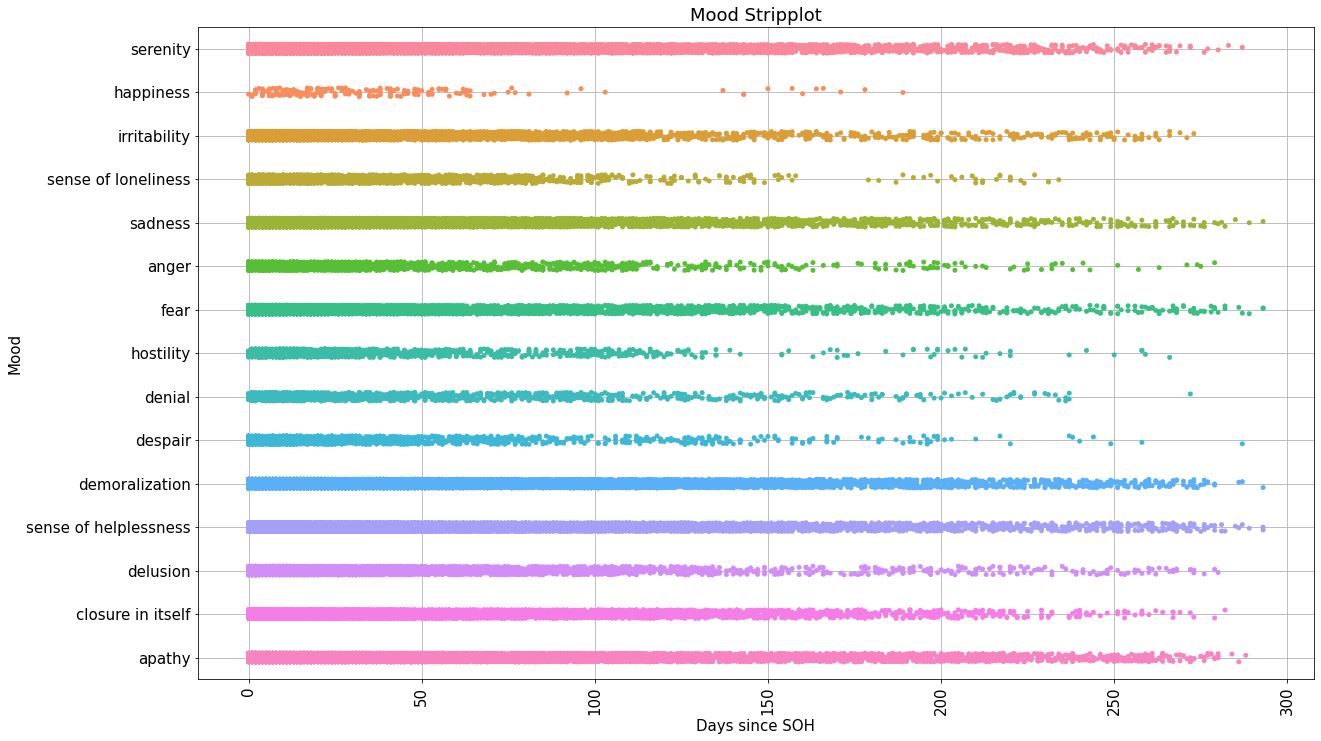

In [29]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
ax = sns.stripplot(x='hos_days', y='mood_num', data=df_ms, orient='h', order=cats)
ax.set_xlabel('Days since SOH')
ax.set_ylabel('Mood')
ax.set_title('Mood Stripplot')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_strip_plot_less_than_300_days.png", bbox_inches='tight')
plt.show()

In [30]:
df_hm = df_ms[['mood_num', 'hos_days']].reset_index(drop=True)

In [31]:
df_hm = df_hm.groupby(['mood_num', 'hos_days']).size().to_frame('size').reset_index()

In [32]:
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
df_hm['mood_num'] = pd.Categorical(df_hm['mood_num'], categories=cats, ordered=True)

In [33]:
df_hm = df_hm.pivot(index='mood_num', columns='hos_days', values='size')
df_hm

hos_days                 0      1      2      3      4      5      6      7    \
mood_num                                                                        
serenity               247.0  590.0  710.0  747.0  743.0  698.0  784.0  724.0   
happiness                1.0    2.0    3.0    2.0    5.0    1.0    6.0    3.0   
irritability           108.0  164.0  135.0  175.0  168.0  140.0  152.0  172.0   
sense of loneliness     45.0   67.0   50.0   75.0   64.0   54.0   53.0   54.0   
sadness                424.0  500.0  445.0  499.0  428.0  351.0  385.0  346.0   
anger                   62.0   99.0   72.0   79.0   64.0   59.0   83.0   74.0   
fear                   273.0  427.0  341.0  357.0  341.0  278.0  286.0  272.0   
hostility               15.0   41.0   44.0   43.0   39.0   42.0   36.0   41.0   
denial                  13.0   45.0   31.0   20.0   26.0   29.0   23.0   31.0   
despair                 42.0   62.0   53.0   53.0   50.0   38.0   46.0   53.0   
demoralization         762.0  987.0  896.0  863.0  783.0  719.0  769.0  770.0   
sense of helplessness  497.0  735.0  711.0  683.0  655.0  594.0  716.0  626.0   
delusion               150.0  245.0  201.0  213.0  191.0  125.0  144.0  158.0   
closure in itself      336.0  433.0  346.0  357.0  320.0  340.0  310.0  341.0   
apathy                 338.0  539.0  522.0  486.0  496.0  477.0  526.0  523.0   

hos_days                 8      9    ...  281  282  283  284  285  286  287  \
mood_num                             ...                                      
serenity               637.0  587.0  ...  NaN  NaN  1.0  NaN  NaN  NaN  1.0   
happiness                4.0    3.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
irritability           144.0  134.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
sense of loneliness     49.0   61.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
sadness                318.0  311.0  ...  1.0  1.0  NaN  NaN  1.0  NaN  NaN   
anger                   70.0   54.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
fear                   249.0  237.0  ...  NaN  2.0  NaN  NaN  NaN  1.0  1.0   
hostility               30.0   41.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
denial                  21.0   20.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
despair                 42.0   35.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  1.0   
demoralization         586.0  642.0  ...  NaN  NaN  NaN  NaN  NaN  1.0  1.0   
sense of helplessness  536.0  553.0  ...  2.0  1.0  NaN  NaN  1.0  1.0  1.0   
delusion               116.0  114.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
closure in itself      280.0  233.0  ...  NaN  1.0  NaN  NaN  NaN  NaN  NaN   
apathy                 413.0  385.0  ...  NaN  NaN  NaN  1.0  NaN  1.0  NaN   

hos_days               288  289  293  
mood_num                              
serenity               NaN  NaN  NaN  
happiness              NaN  NaN  NaN  
irritability           NaN  NaN  NaN  
sense of loneliness    NaN  NaN  NaN  
sadness                NaN  1.0  1.0  
anger                  NaN  NaN  NaN  
fear                   NaN  1.0  2.0  
hostility              NaN  NaN  NaN  
denial                 NaN  NaN  NaN  
despair                NaN  NaN  NaN  
demoralization         NaN  NaN  1.0  
sense of helplessness  NaN  1.0  2.0  
delusion               NaN  NaN  NaN  
closure in itself      NaN  NaN  NaN  
apathy                 1.0  NaN  NaN  

[15 rows x 291 columns]

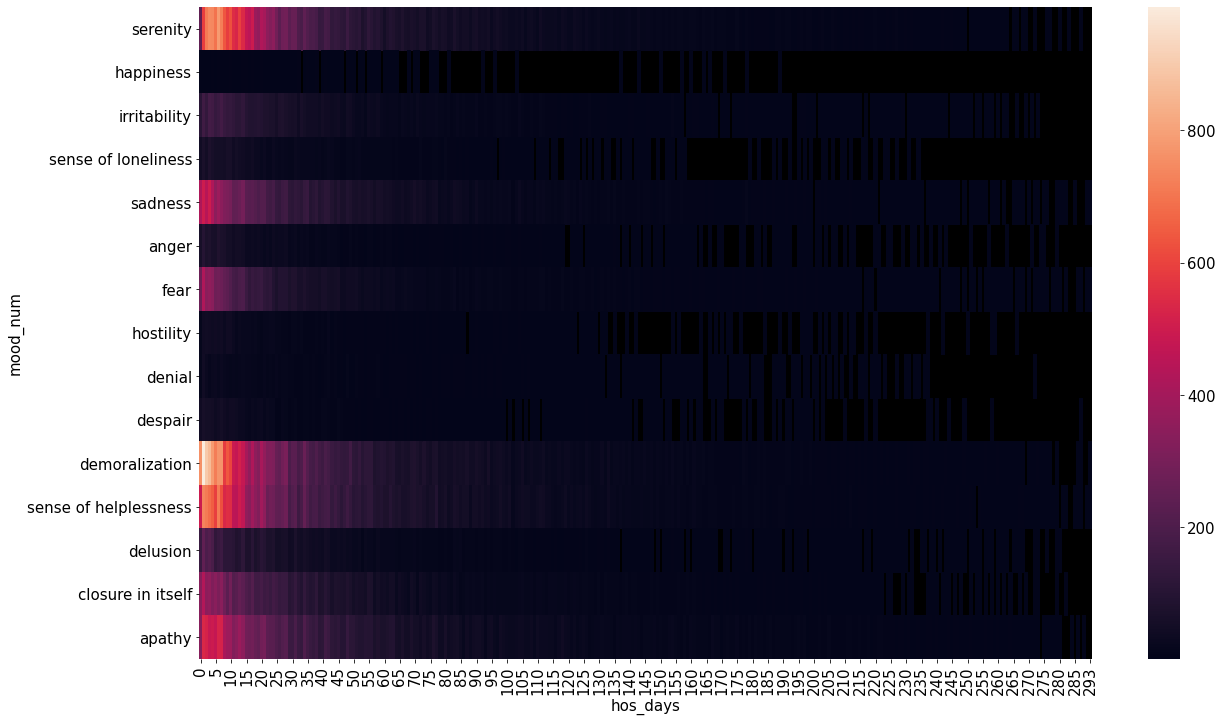

In [34]:
# heatmap of moods for patients with survival <= 300 days
pat_hm = sns.heatmap(df_hm)
pat_hm.set_facecolor('xkcd:black')

In [35]:
log_mood_num(df_ms)

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [36]:
df_ms

IDEHR EHRType        TimeStamp_Insert                     SOH  \
0        1382     EHR 2015-10-06 11:20:09.030 2015-09-11 17:39:52.193   
1        1382     EHR 2015-10-06 13:08:33.307 2015-09-11 17:39:52.193   
2        1382     EHR 2015-10-06 17:51:06.480 2015-09-11 17:39:52.193   
3        1382     EHR 2015-10-07 05:20:13.373 2015-09-11 17:39:52.193   
4        1382     EHR 2015-10-07 11:12:16.007 2015-09-11 17:39:52.193   
...       ...     ...                     ...                     ...   
101242  29411     AMB 2020-07-19 12:04:33.460 2020-07-17 13:54:50.597   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   

        survival_time_days                   Diagnosis mood_num  hos_days  
0                     45.0  Palliative (Non-Malignant)       10        24  
1                     45.0  Palliative (Non-Malignant)       10        24  
2                     45.0  Palliative (Non-Malignant)       10        25  
3                     45.0  Palliative (Non-Malignant)       10        25  
4                     45.0  Palliative (Non-Malignant)       10        25  
...                    ...                         ...      ...       ...  
101242                 1.0                        Lung      250         1  
101243                 2.0                        Lung       10         0  
101243                 2.0                        Lung       30         0  
101244                 2.0                        Lung       10         2  
101244                 2.0                        Lung       30         2  

[145559 rows x 8 columns]

In [37]:
ids = df_ms.IDEHR.unique()
ids

array([ 1382,  1403,  1412, ..., 29399, 29411, 29440], dtype=int64)

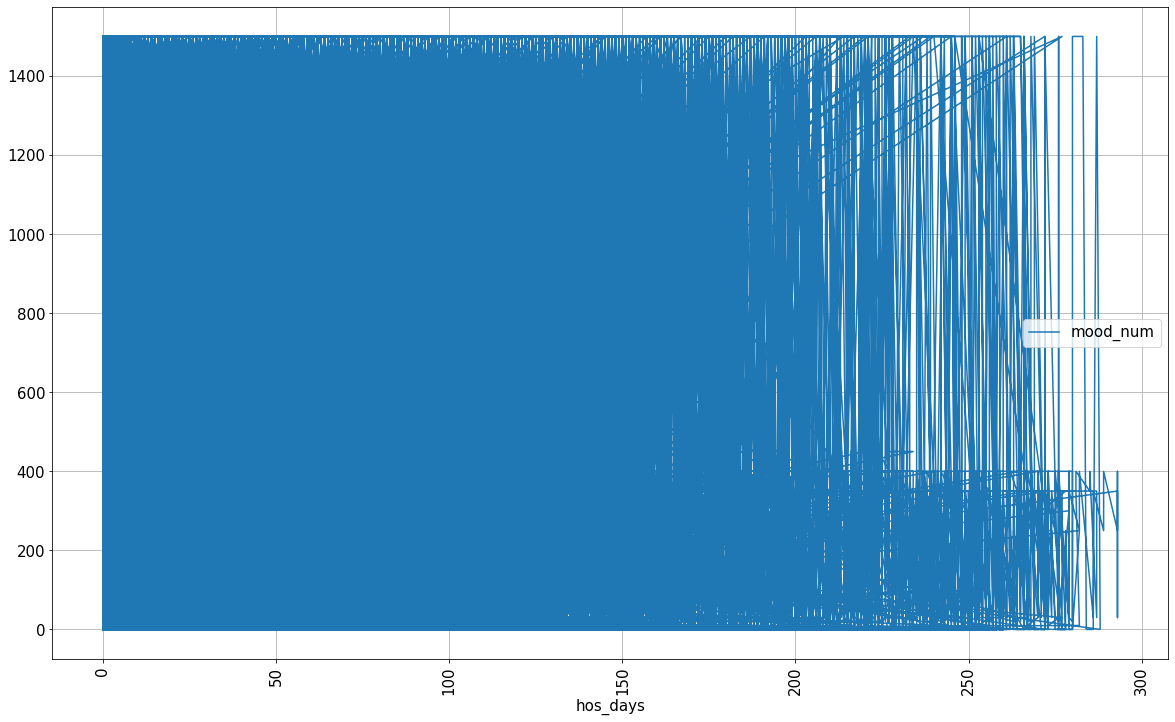

In [38]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

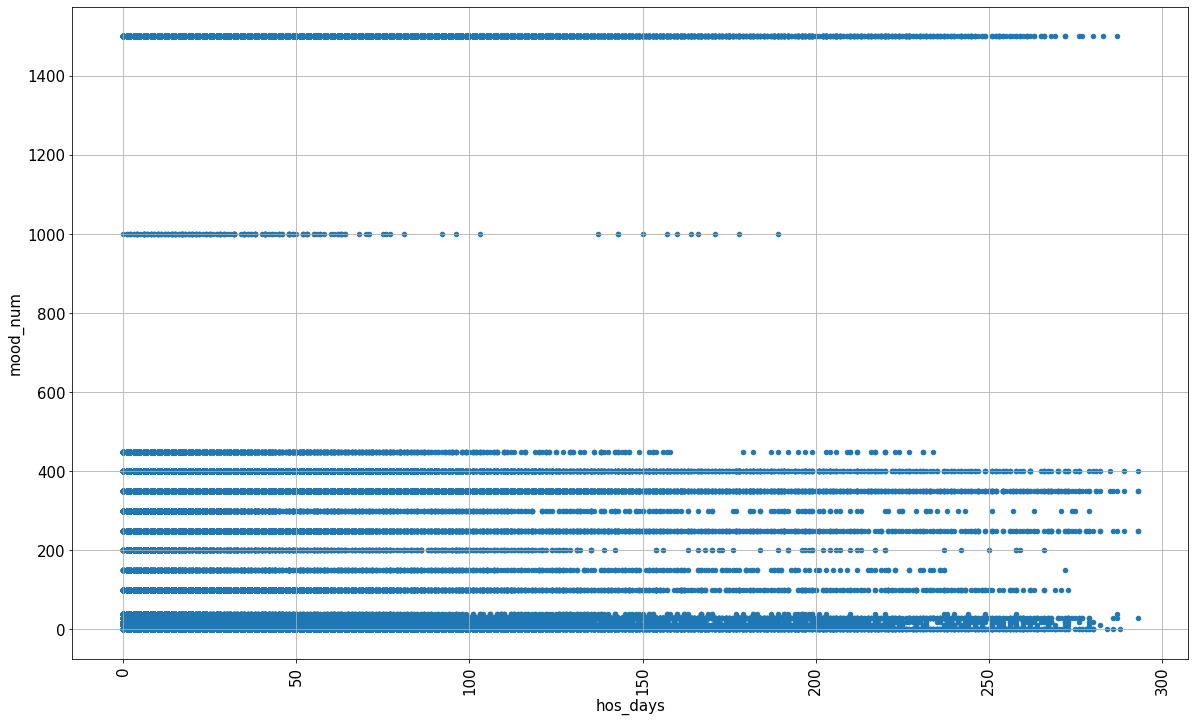

In [39]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot.scatter(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

In [40]:
# df_ma[df_ma['Time_Pct'] > 100.0]

In [41]:
# mood stripplots for patients with survival times <= 30 days (aka late referrals)
df_ms = df_ma[df_ma['survival_time_days'] <= 30.0]
df_ms

IDEHR EHRType        TimeStamp_Insert                     SOH  \
75       1403     EHR 2015-10-02 12:44:32.987 2015-09-24 17:42:06.257   
76       1403     EHR 2015-10-02 13:03:23.980 2015-09-24 17:42:06.257   
76       1403     EHR 2015-10-02 13:03:23.980 2015-09-24 17:42:06.257   
77       1403     EHR 2015-10-02 17:30:56.243 2015-09-24 17:42:06.257   
77       1403     EHR 2015-10-02 17:30:56.243 2015-09-24 17:42:06.257   
...       ...     ...                     ...                     ...   
101242  29411     AMB 2020-07-19 12:04:33.460 2020-07-17 13:54:50.597   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101243  29440     AMB 2020-07-21 11:27:09.957 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   
101244  29440     AMB 2020-07-23 09:42:34.347 2020-07-20 17:23:52.570   

        survival_time_days                   Diagnosis           mood_num  \
75                    14.0  Palliative (Non-Malignant)               fear   
76                    14.0  Palliative (Non-Malignant)     demoralization   
76                    14.0  Palliative (Non-Malignant)               fear   
77                    14.0  Palliative (Non-Malignant)     demoralization   
77                    14.0  Palliative (Non-Malignant)               fear   
...                    ...                         ...                ...   
101242                 1.0                        Lung               fear   
101243                 2.0                        Lung  closure in itself   
101243                 2.0                        Lung     demoralization   
101244                 2.0                        Lung  closure in itself   
101244                 2.0                        Lung     demoralization   

        hos_days  
75             7  
76             7  
76             7  
77             7  
77             7  
...          ...  
101242         1  
101243         0  
101243         0  
101244         2  
101244         2  

[54155 rows x 8 columns]

In [42]:
len(df_ms.IDEHR.unique())

3438

In [43]:
df_ms[df_ms['hos_days'] > 30.0]

IDEHR EHRType        TimeStamp_Insert                     SOH  \
30514   3593     EHR 2019-06-30 13:37:24.893 2019-05-30 10:00:41.260   
37437   4889     EHR 2019-12-20 18:14:51.347 2019-11-19 16:56:32.797   
37438   4889     EHR 2019-12-21 10:13:00.247 2019-11-19 16:56:32.797   
37439   4889     EHR 2019-12-21 12:59:12.977 2019-11-19 16:56:32.797   
37440   4889     EHR 2019-12-21 17:27:33.073 2019-11-19 16:56:32.797   
...      ...     ...                     ...                     ...   
92885  23420     AMB 2019-10-18 13:02:05.883 2019-09-17 08:19:07.157   
92886  23420     AMB 2019-10-21 10:53:25.337 2019-09-17 08:19:07.157   
92886  23420     AMB 2019-10-21 10:53:25.337 2019-09-17 08:19:07.157   
92887  23420     AMB 2019-10-21 16:20:25.290 2019-09-17 08:19:07.157   
92887  23420     AMB 2019-10-21 16:20:25.290 2019-09-17 08:19:07.157   

       survival_time_days                   Diagnosis               mood_num  \
30514                30.0  Palliative (Non-Malignant)                    NaN   
37437                 8.0               Liver-Biliary  sense of helplessness   
37438                 8.0               Liver-Biliary  sense of helplessness   
37439                 8.0               Liver-Biliary                    NaN   
37440                 8.0               Liver-Biliary  sense of helplessness   
...                   ...                         ...                    ...   
92885                13.0                     Sarcoma         demoralization   
92886                13.0                     Sarcoma                 apathy   
92886                13.0                     Sarcoma         demoralization   
92887                13.0                     Sarcoma               delusion   
92887                13.0                     Sarcoma  sense of helplessness   

       hos_days  
30514        31  
37437        31  
37438        31  
37439        31  
37440        32  
...         ...  
92885        31  
92886        34  
92886        34  
92887        34  
92887        34  

[226 rows x 8 columns]

<Figure size 1440x864 with 0 Axes>

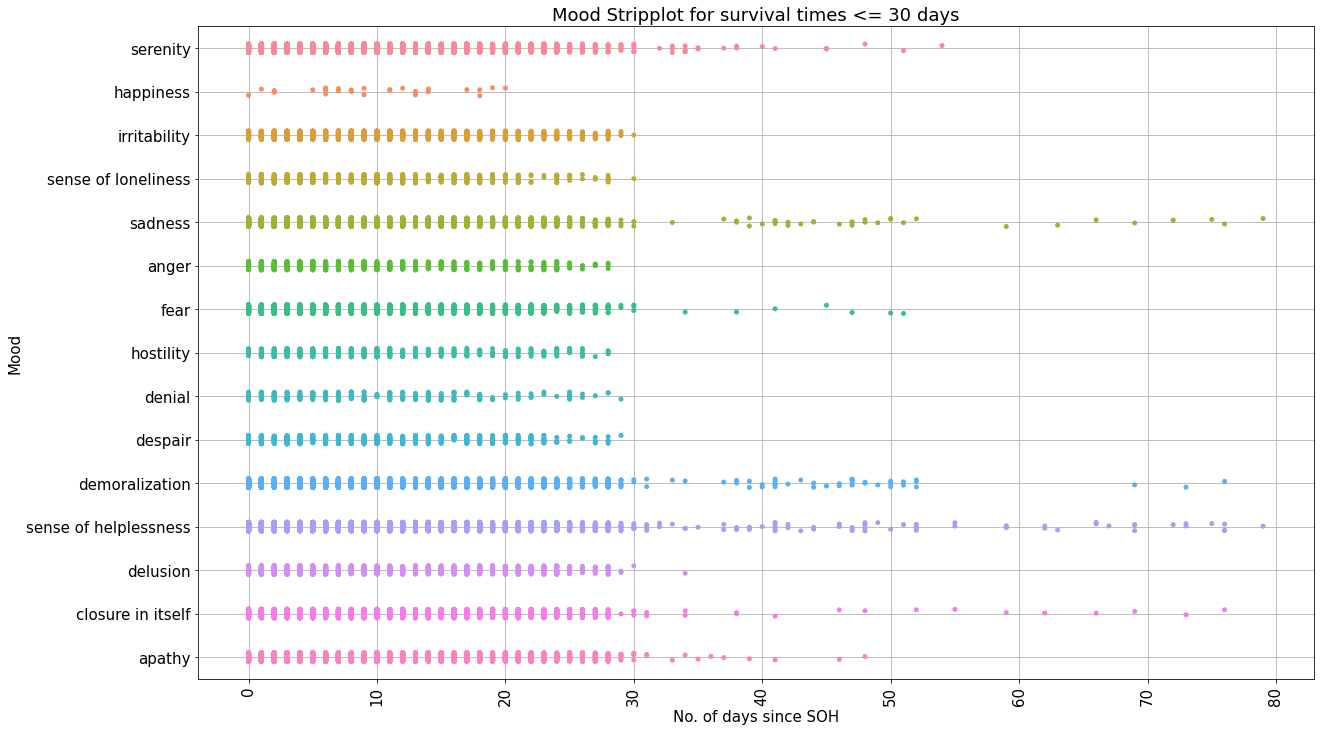

In [44]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
ax = sns.stripplot(x='hos_days', y='mood_num', data=df_ms, orient='h', order=cats)
ax.set_xlabel('No. of days since SOH')
ax.set_ylabel('Mood')
ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
plt.show()

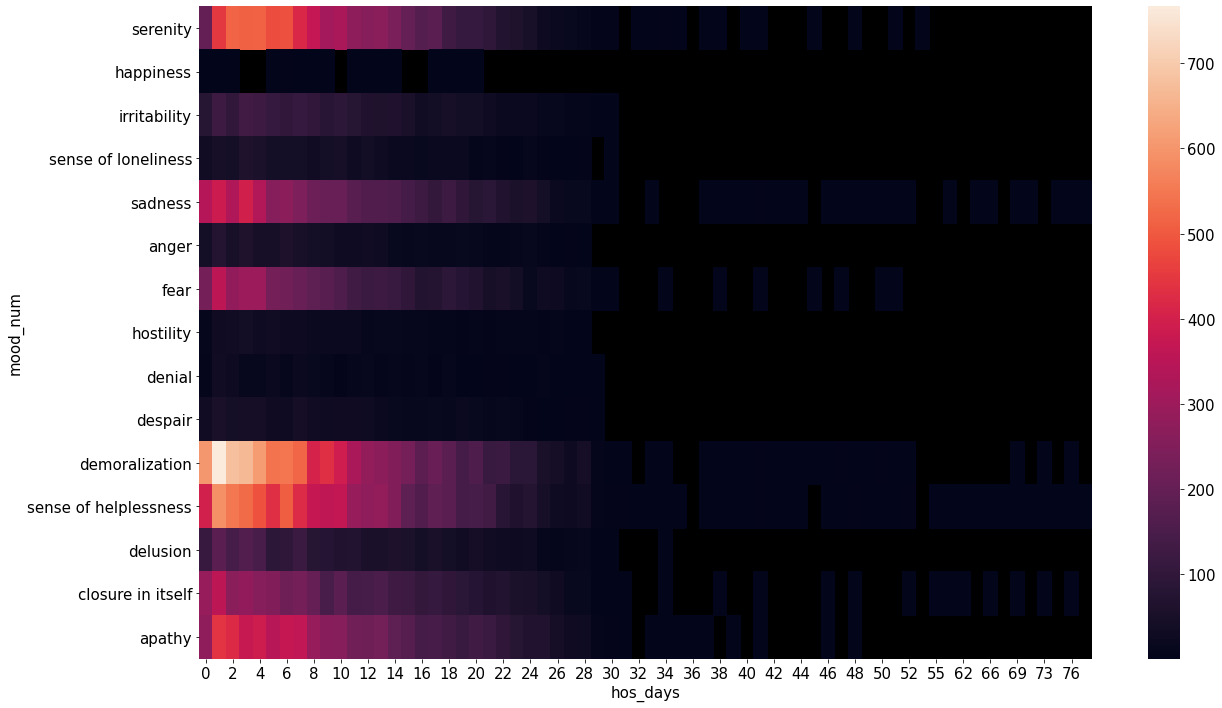

In [45]:
# heatmap
df_hm = df_ms[['mood_num', 'hos_days']].reset_index(drop=True)
df_hm = df_hm.groupby(['mood_num', 'hos_days']).size().to_frame('size').reset_index()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
df_hm['mood_num'] = pd.Categorical(df_hm['mood_num'], categories=cats, ordered=True)
df_hm = df_hm.pivot(index='mood_num', columns='hos_days', values='size')
pat_hm = sns.heatmap(df_hm)
pat_hm.set_facecolor('xkcd:black')

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


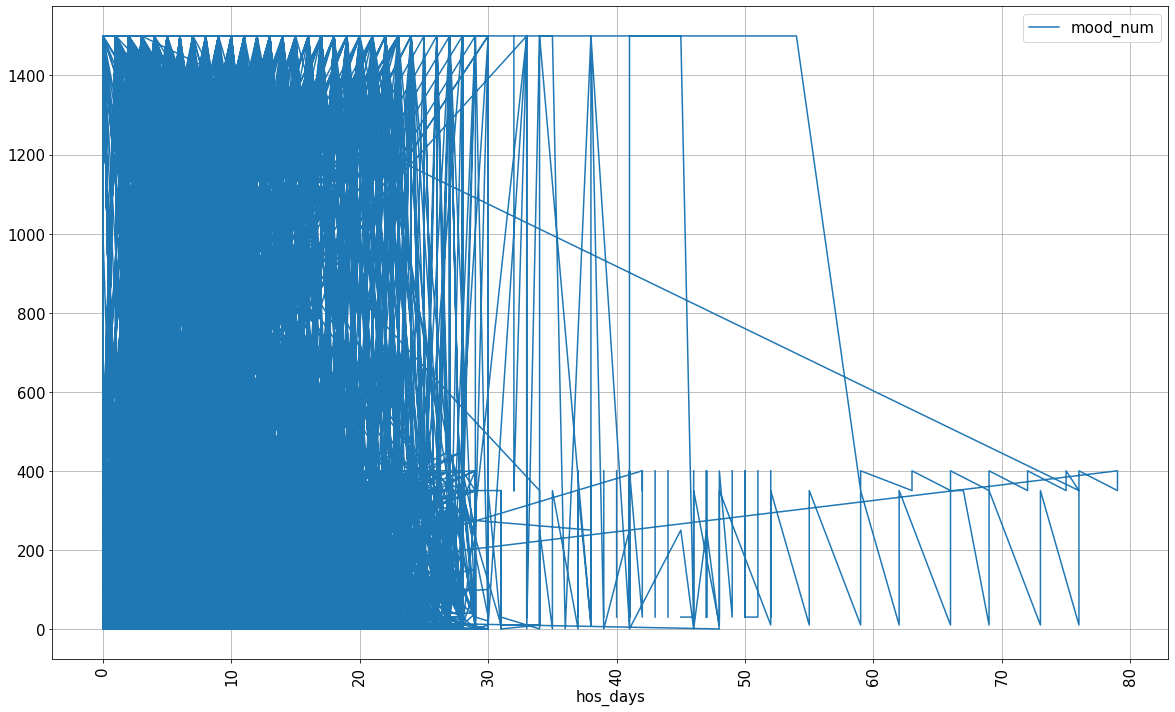

In [46]:
log_mood_num(df_ms)
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

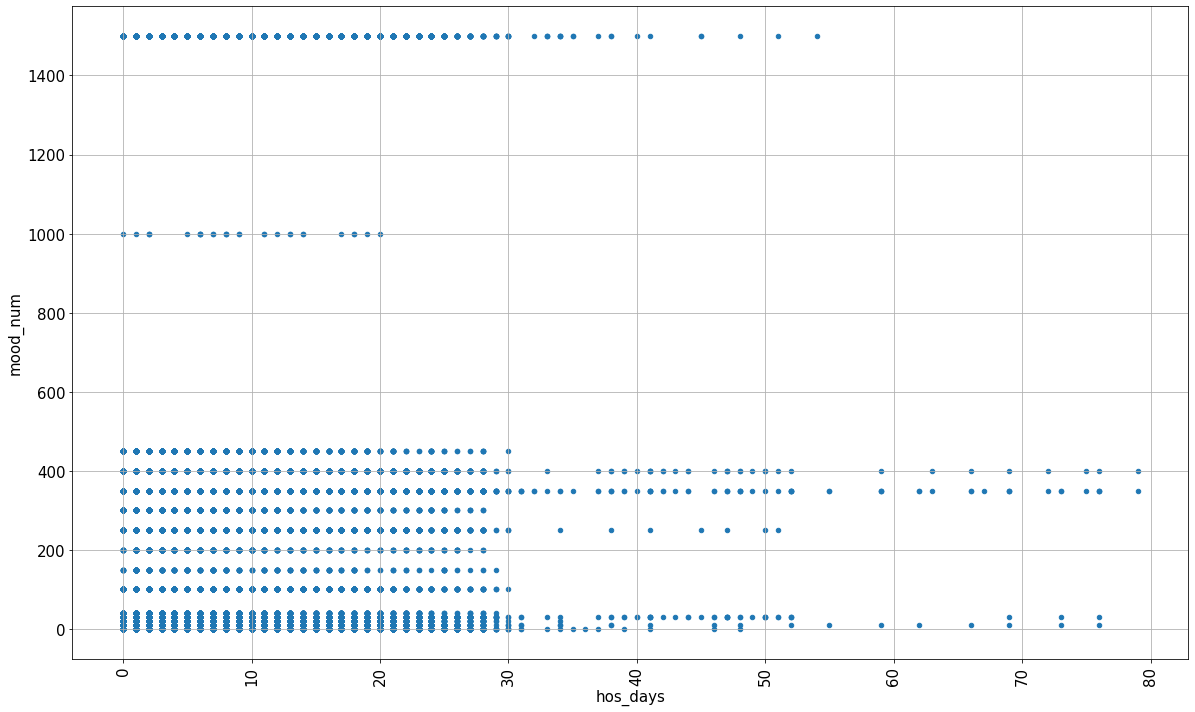

In [47]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot.scatter(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

In [48]:
# mood stripplots of patients with survival more than 30 days (aka early referrals)
df_ms = df_ma[df_ma['survival_time_days'] >= 30.0]
df_ms

IDEHR EHRType        TimeStamp_Insert                     SOH  \
0        1382     EHR 2015-10-06 11:20:09.030 2015-09-11 17:39:52.193   
1        1382     EHR 2015-10-06 13:08:33.307 2015-09-11 17:39:52.193   
2        1382     EHR 2015-10-06 17:51:06.480 2015-09-11 17:39:52.193   
3        1382     EHR 2015-10-07 05:20:13.373 2015-09-11 17:39:52.193   
4        1382     EHR 2015-10-07 11:12:16.007 2015-09-11 17:39:52.193   
...       ...     ...                     ...                     ...   
101064  28878     AMB 2020-07-14 13:14:41.847 2020-06-15 11:44:10.767   
101065  28878     AMB 2020-07-16 13:02:18.307 2020-06-15 11:44:10.767   
101065  28878     AMB 2020-07-16 13:02:18.307 2020-06-15 11:44:10.767   
101065  28878     AMB 2020-07-16 13:02:18.307 2020-06-15 11:44:10.767   
101066  28878     AMB 2020-07-17 11:10:33.873 2020-06-15 11:44:10.767   

        survival_time_days                   Diagnosis           mood_num  \
0                     45.0  Palliative (Non-Malignant)  closure in itself   
1                     45.0  Palliative (Non-Malignant)  closure in itself   
2                     45.0  Palliative (Non-Malignant)  closure in itself   
3                     45.0  Palliative (Non-Malignant)  closure in itself   
4                     45.0  Palliative (Non-Malignant)  closure in itself   
...                    ...                         ...                ...   
101064                32.0                   Brain-Snc               fear   
101065                32.0                   Brain-Snc             apathy   
101065                32.0                   Brain-Snc            despair   
101065                32.0                   Brain-Snc               fear   
101066                32.0                   Brain-Snc  closure in itself   

        hos_days  
0             24  
1             24  
2             25  
3             25  
4             25  
...          ...  
101064        29  
101065        31  
101065        31  
101065        31  
101066        31  

[103033 rows x 8 columns]

In [49]:
len(df_ms.IDEHR.unique())

1725

<Figure size 1440x864 with 0 Axes>

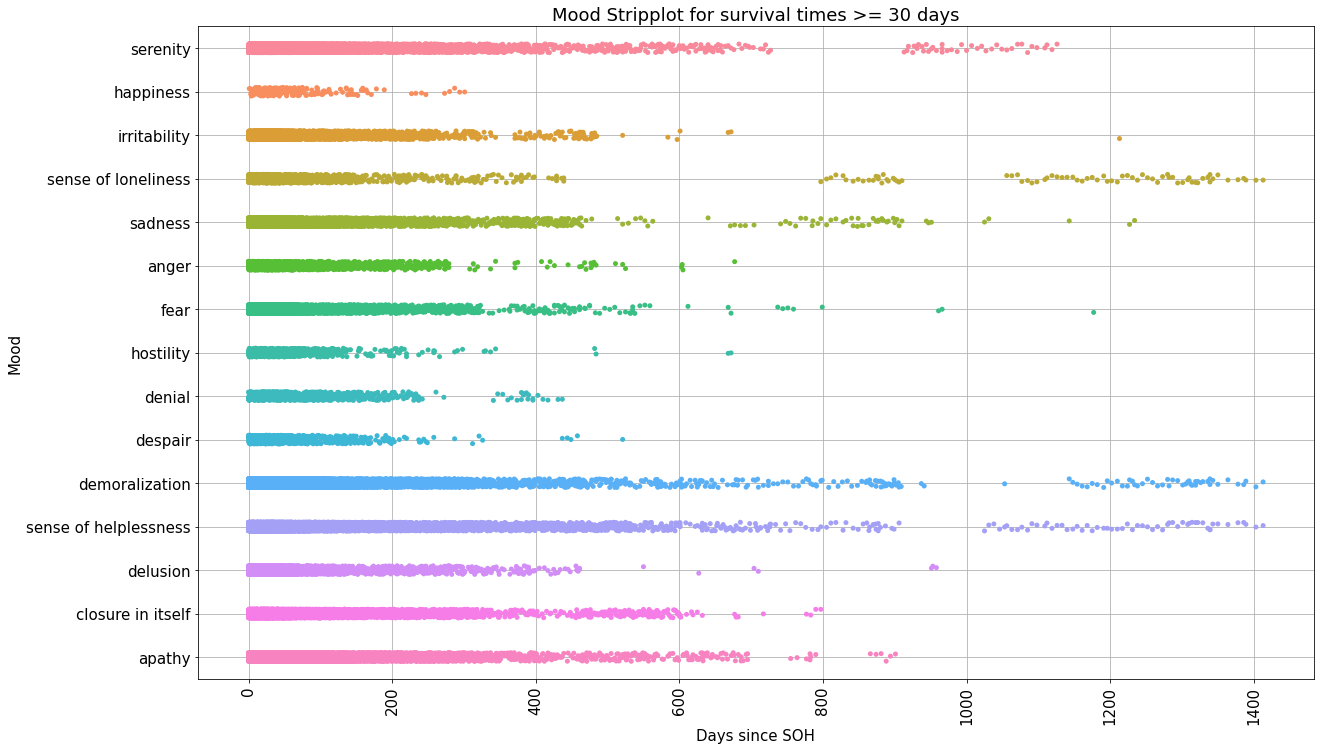

In [50]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
ax = sns.stripplot(x='hos_days', y='mood_num', data=df_ms, orient='h', order=cats)
ax.set_xlabel('Days since SOH')
ax.set_ylabel('Mood')
ax.set_title('Mood Stripplot for survival times >= 30 days')
plt.xticks(rotation=90)
plt.grid()
plt.savefig("./graphs/referral analysis/mood_more_than_30_days.png", bbox_inches='tight')
plt.show()

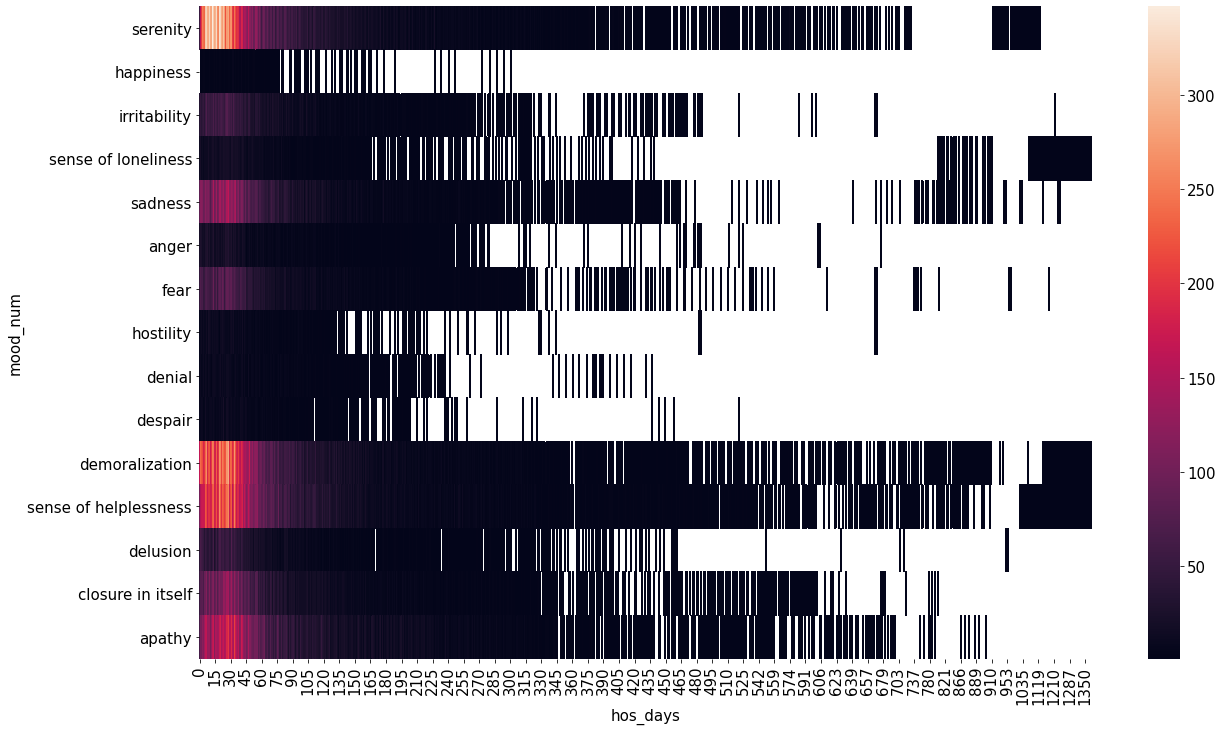

In [51]:
# heatmap
df_hm = df_ms[['mood_num', 'hos_days']].reset_index(drop=True)
df_hm = df_hm.groupby(['mood_num', 'hos_days']).size().to_frame('size').reset_index()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
df_hm['mood_num'] = pd.Categorical(df_hm['mood_num'], categories=cats, ordered=True)
df_hm = df_hm.pivot(index='mood_num', columns='hos_days', values='size')
pat_hm = sns.heatmap(df_hm)

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


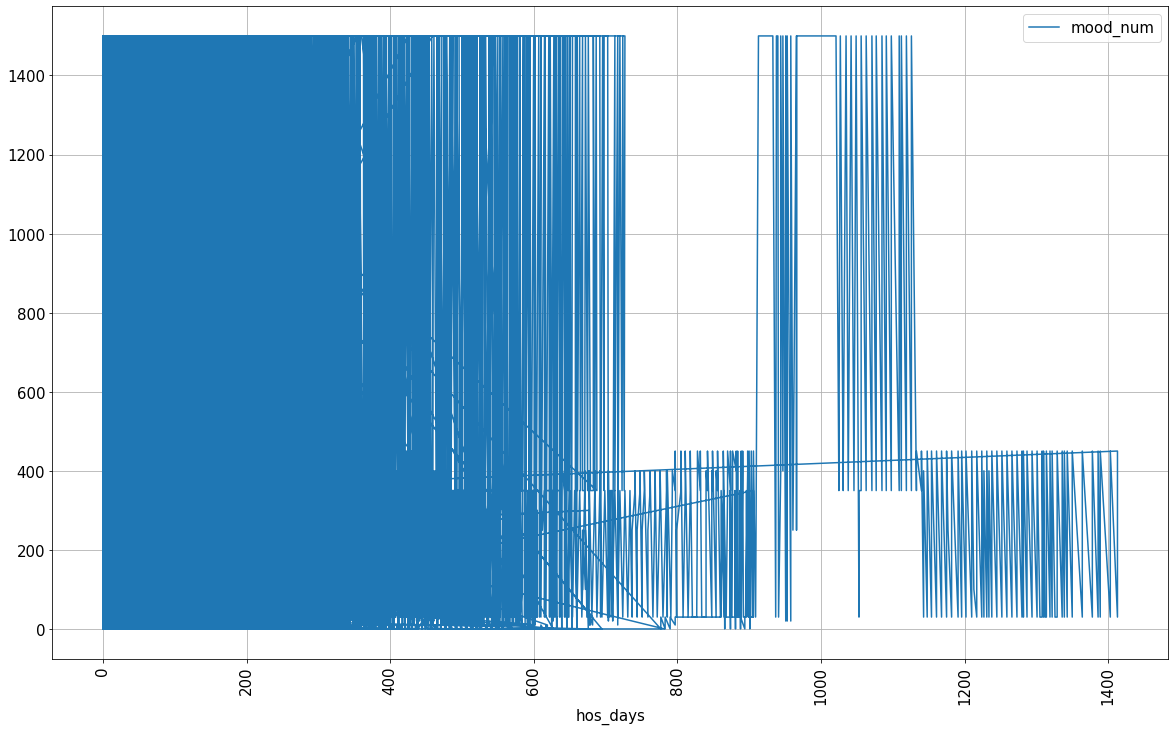

In [52]:
log_mood_num(df_ms)
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

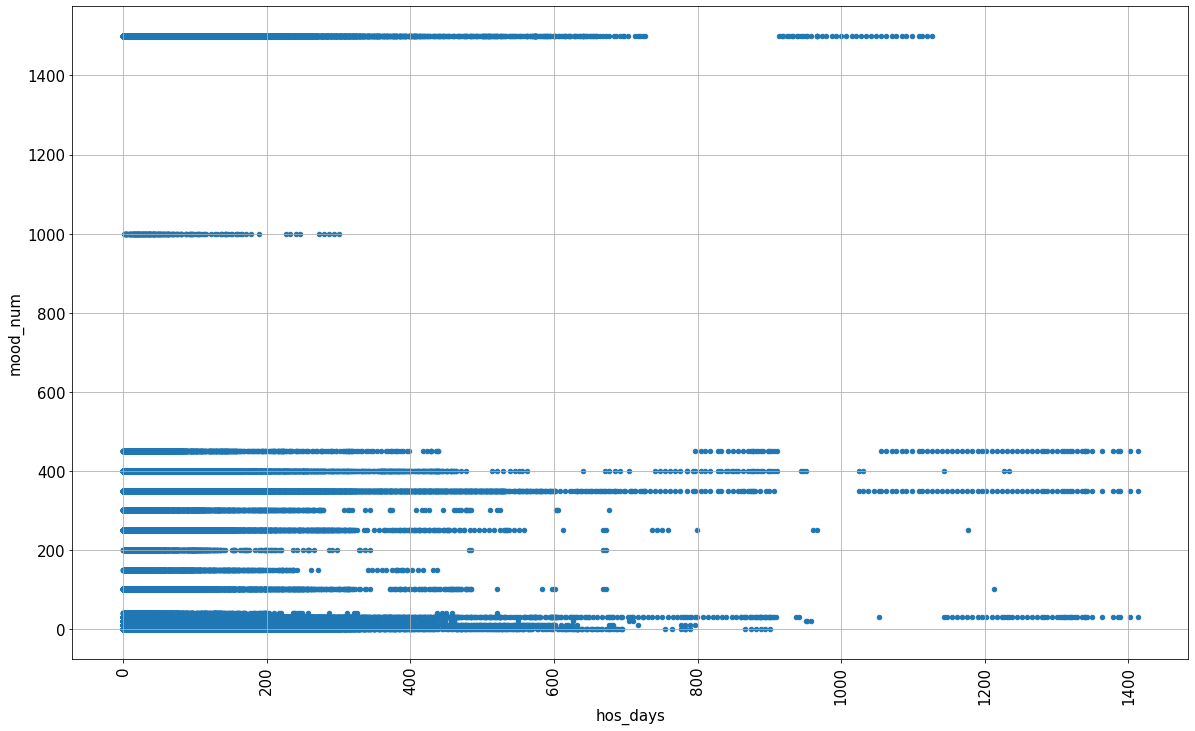

In [53]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot.scatter(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

In [106]:
# mood stripplots of patients with hos days in a reasonable range
df_ms = df_ma[df_ma['survival_time_days'] >= 120.0]
df_ms

IDEHR EHRType        TimeStamp_Insert                     SOH  \
841     1489     AMB 2015-12-11 19:28:42.953 2015-04-21 03:36:25.613   
842     1489     AMB 2015-12-14 18:15:15.283 2015-04-21 03:36:25.613   
842     1489     AMB 2015-12-14 18:15:15.283 2015-04-21 03:36:25.613   
843     1489     AMB 2015-12-17 19:04:36.433 2015-04-21 03:36:25.613   
843     1489     AMB 2015-12-17 19:04:36.433 2015-04-21 03:36:25.613   
...      ...     ...                     ...                     ...   
98536  26926     AMB 2020-07-13 18:11:46.503 2020-02-27 08:49:41.947   
98537  26926     AMB 2020-07-14 11:53:15.330 2020-02-27 08:49:41.947   
98538  26926     AMB 2020-07-15 19:17:42.927 2020-02-27 08:49:41.947   
98538  26926     AMB 2020-07-15 19:17:42.927 2020-02-27 08:49:41.947   
98538  26926     AMB 2020-07-15 19:17:42.927 2020-02-27 08:49:41.947   

       survival_time_days                   Diagnosis               mood_num  \
841                 249.0  Palliative (Non-Malignant)         demoralization   
842                 249.0  Palliative (Non-Malignant)      closure in itself   
842                 249.0  Palliative (Non-Malignant)         demoralization   
843                 249.0  Palliative (Non-Malignant)      closure in itself   
843                 249.0  Palliative (Non-Malignant)         demoralization   
...                   ...                         ...                    ...   
98536               141.0                        Lung  sense of helplessness   
98537               141.0                        Lung         demoralization   
98538               141.0                        Lung         demoralization   
98538               141.0                        Lung                   fear   
98538               141.0                        Lung  sense of helplessness   

       hos_days  
841         234  
842         237  
842         237  
843         240  
843         240  
...         ...  
98536       137  
98537       138  
98538       139  
98538       139  
98538       139  

[35055 rows x 8 columns]

In [107]:
df_ms = df_ms[df_ms['hos_days'] <= 120]

<Figure size 1440x864 with 0 Axes>

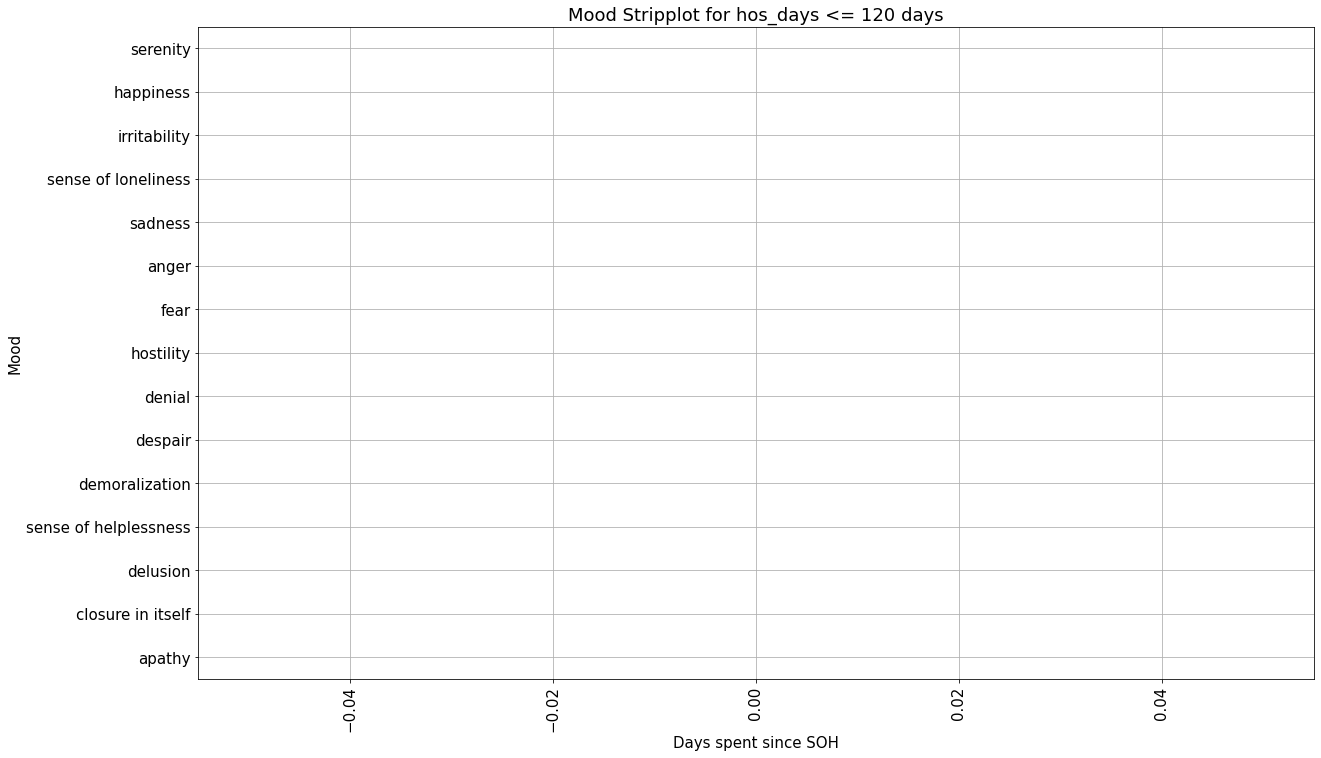

In [105]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
ax = sns.stripplot(x='hos_days', y='mood_num', data=df_ms, orient='h', order=cats)
ax.set_xlabel('Days spent since SOH')
ax.set_ylabel('Mood')
ax.set_title('Mood Stripplot for hos_days <= 120 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_more_than_30_days.png", bbox_inches='tight')
plt.show()

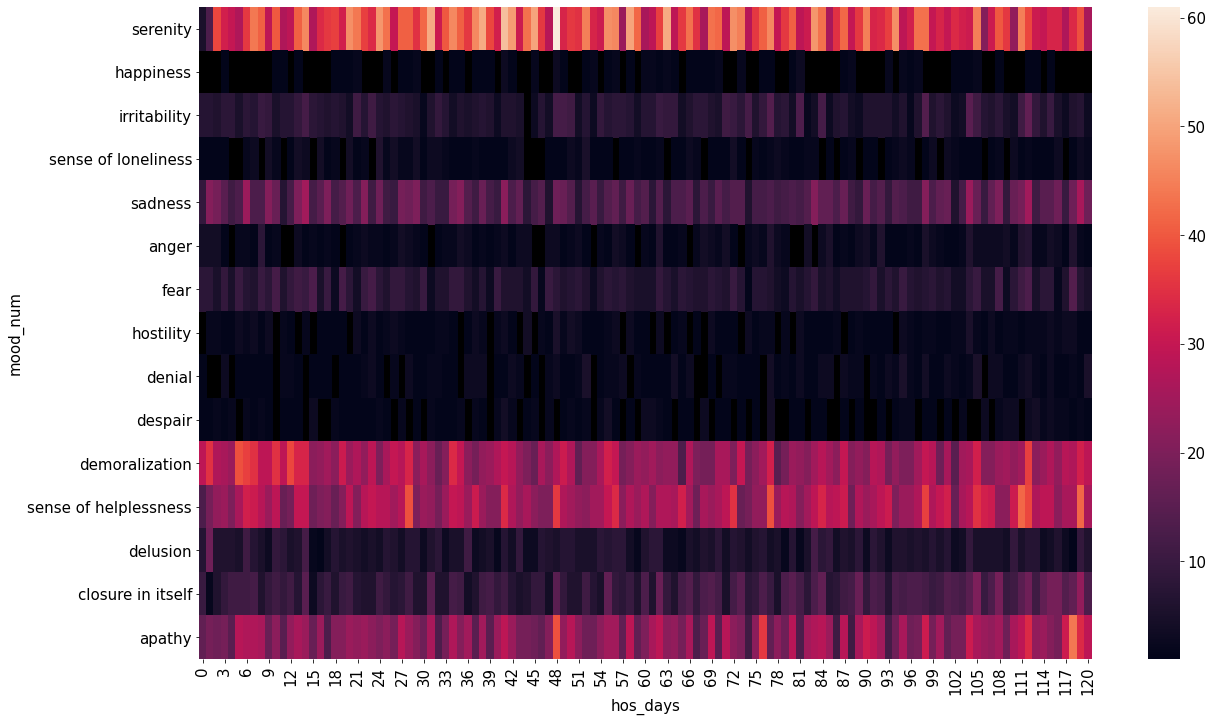

In [108]:
# heatmap
df_hm = df_ms[['mood_num', 'hos_days']].reset_index(drop=True)
df_hm = df_hm.groupby(['mood_num', 'hos_days']).size().to_frame('size').reset_index()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
df_hm['mood_num'] = pd.Categorical(df_hm['mood_num'], categories=cats, ordered=True)
df_hm = df_hm.pivot(index='mood_num', columns='hos_days', values='size')
pat_hm = sns.heatmap(df_hm)
pat_hm.set_facecolor('xkcd:black')

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


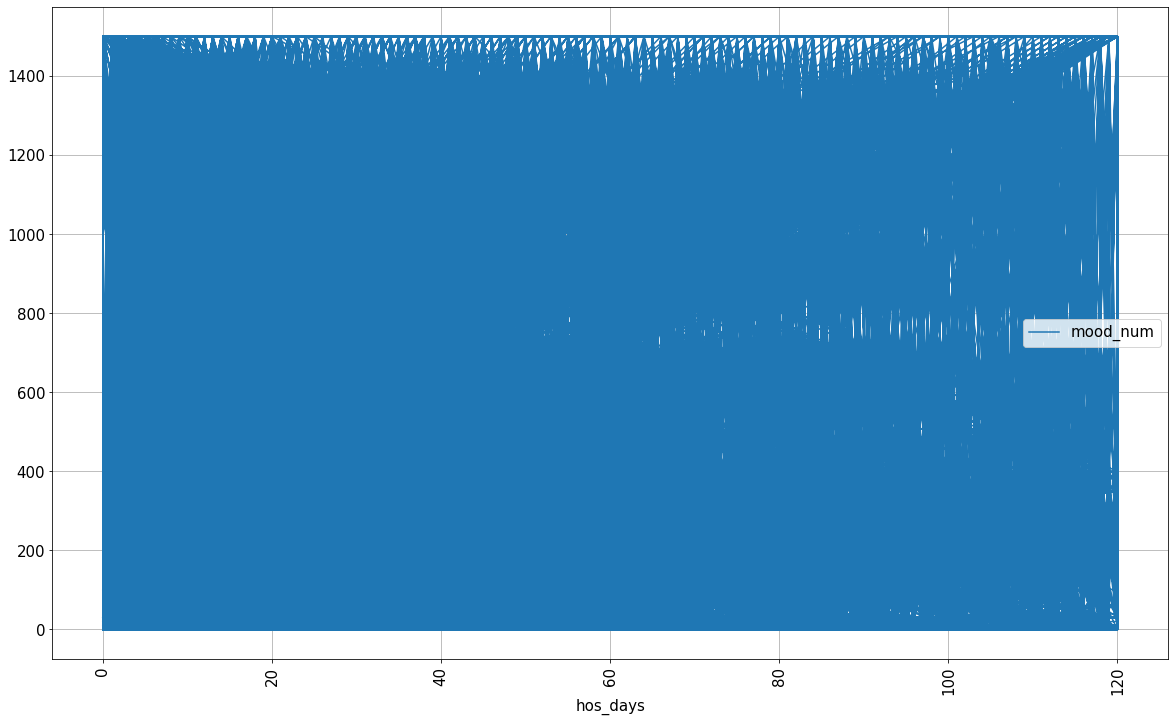

In [57]:
log_mood_num(df_ms)
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

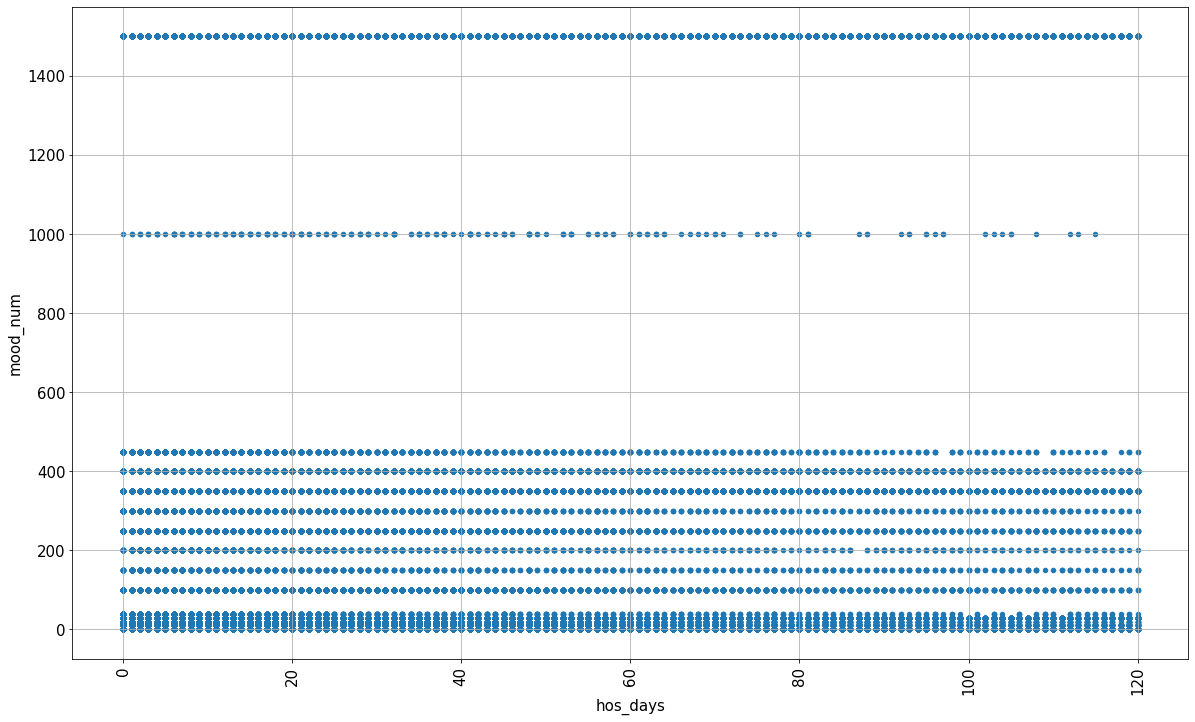

In [58]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot.scatter(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

In [109]:
# mood stripplots of patients with hos days in a reasonable range
df_ms = df_ma[df_ma['survival_time_days'] >= 60.0]
df_ms

IDEHR EHRType        TimeStamp_Insert                     SOH  \
841      1489     AMB 2015-12-11 19:28:42.953 2015-04-21 03:36:25.613   
842      1489     AMB 2015-12-14 18:15:15.283 2015-04-21 03:36:25.613   
842      1489     AMB 2015-12-14 18:15:15.283 2015-04-21 03:36:25.613   
843      1489     AMB 2015-12-17 19:04:36.433 2015-04-21 03:36:25.613   
843      1489     AMB 2015-12-17 19:04:36.433 2015-04-21 03:36:25.613   
...       ...     ...                     ...                     ...   
100502  28338     AMB 2020-07-09 16:34:18.320 2020-05-14 16:47:09.030   
100503  28338     AMB 2020-07-13 17:16:56.707 2020-05-14 16:47:09.030   
100503  28338     AMB 2020-07-13 17:16:56.707 2020-05-14 16:47:09.030   
100504  28338     AMB 2020-07-15 08:54:48.940 2020-05-14 16:47:09.030   
100505  28338     AMB 2020-07-17 08:12:49.723 2020-05-14 16:47:09.030   

        survival_time_days                   Diagnosis               mood_num  \
841                  249.0  Palliative (Non-Malignant)         demoralization   
842                  249.0  Palliative (Non-Malignant)      closure in itself   
842                  249.0  Palliative (Non-Malignant)         demoralization   
843                  249.0  Palliative (Non-Malignant)      closure in itself   
843                  249.0  Palliative (Non-Malignant)         demoralization   
...                    ...                         ...                    ...   
100502                64.0                        Lung  sense of helplessness   
100503                64.0                        Lung         demoralization   
100503                64.0                        Lung  sense of helplessness   
100504                64.0                        Lung                despair   
100505                64.0                        Lung                despair   

        hos_days  
841          234  
842          237  
842          237  
843          240  
843          240  
...          ...  
100502        55  
100503        60  
100503        60  
100504        61  
100505        63  

[65173 rows x 8 columns]

<Figure size 1440x864 with 0 Axes>

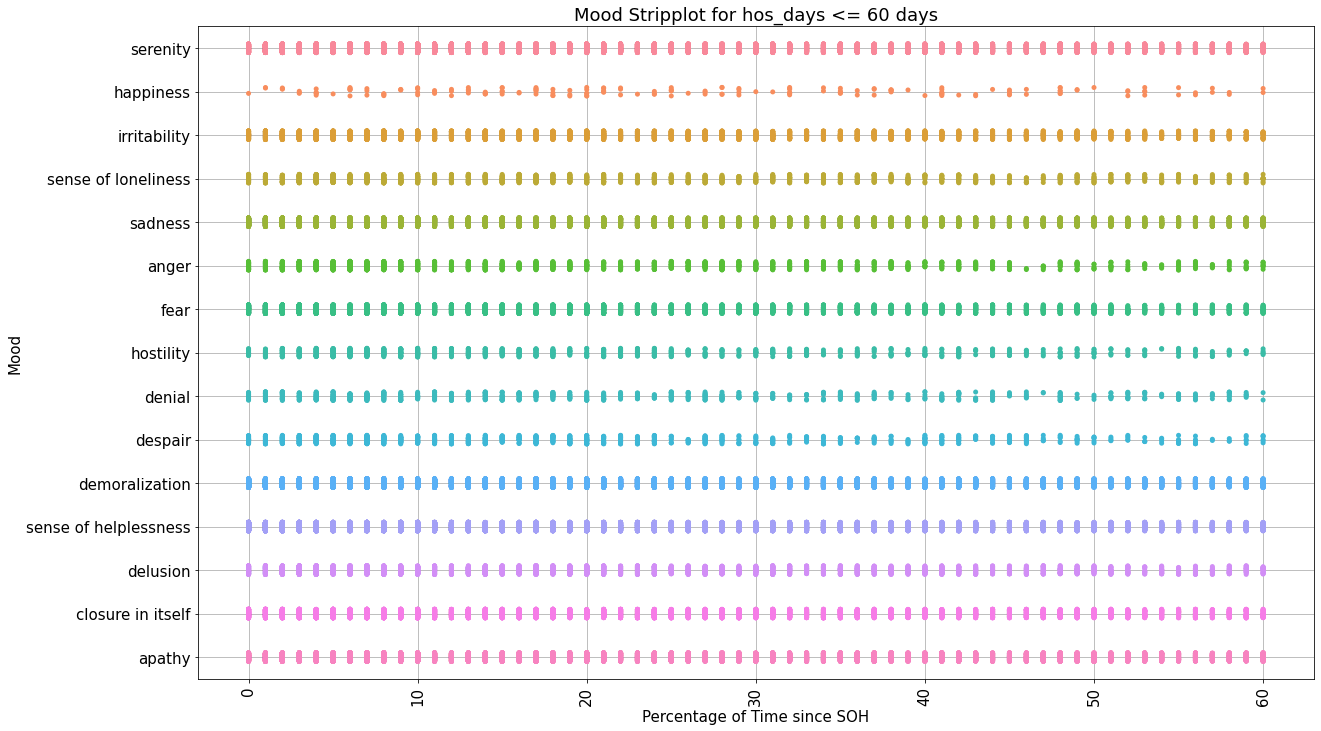

In [60]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
ax = sns.stripplot(x='hos_days', y='mood_num', data=df_ms, orient='h', order=cats)
ax.set_xlabel('Percentage of Time since SOH')
ax.set_ylabel('Mood')
ax.set_title('Mood Stripplot for hos_days <= 60 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_more_than_30_days.png", bbox_inches='tight')
plt.show()

In [110]:
df_ms = df_ms[df_ms['hos_days'] <= 60]

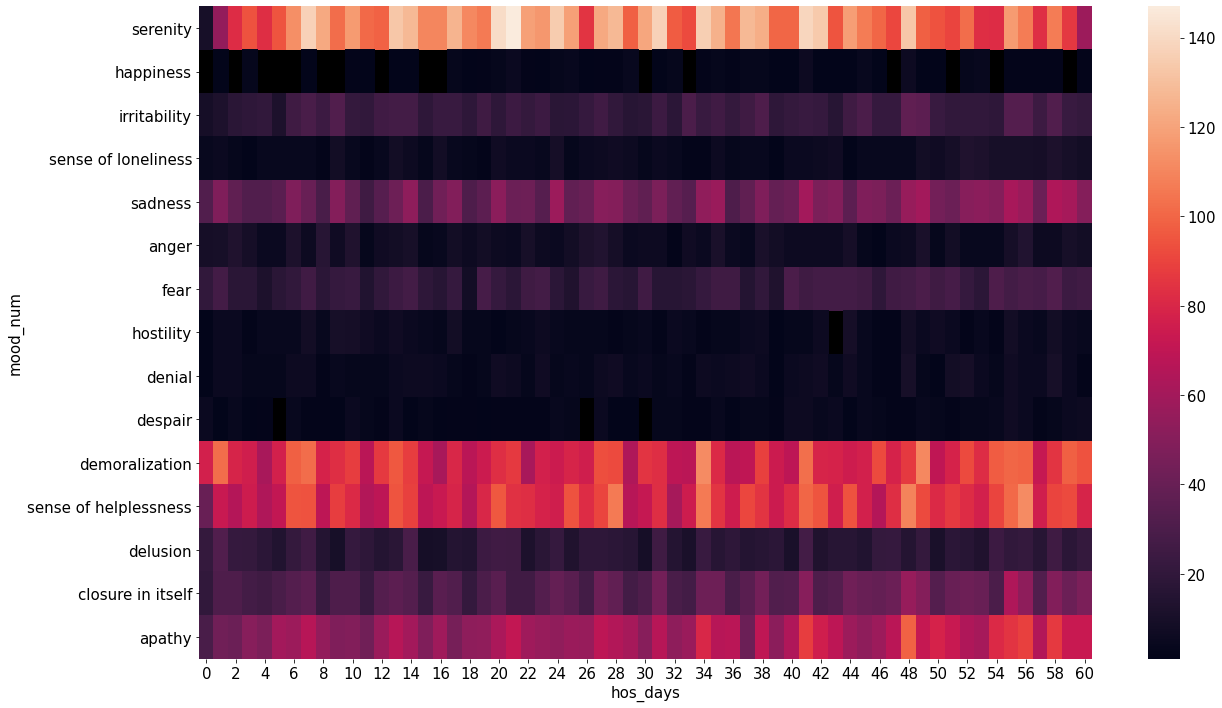

In [111]:
# heatmap
df_hm = df_ms[['mood_num', 'hos_days']].reset_index(drop=True)
df_hm = df_hm.groupby(['mood_num', 'hos_days']).size().to_frame('size').reset_index()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
df_hm['mood_num'] = pd.Categorical(df_hm['mood_num'], categories=cats, ordered=True)
df_hm = df_hm.pivot(index='mood_num', columns='hos_days', values='size')
pat_hm = sns.heatmap(df_hm)
pat_hm.set_facecolor('xkcd:black')

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


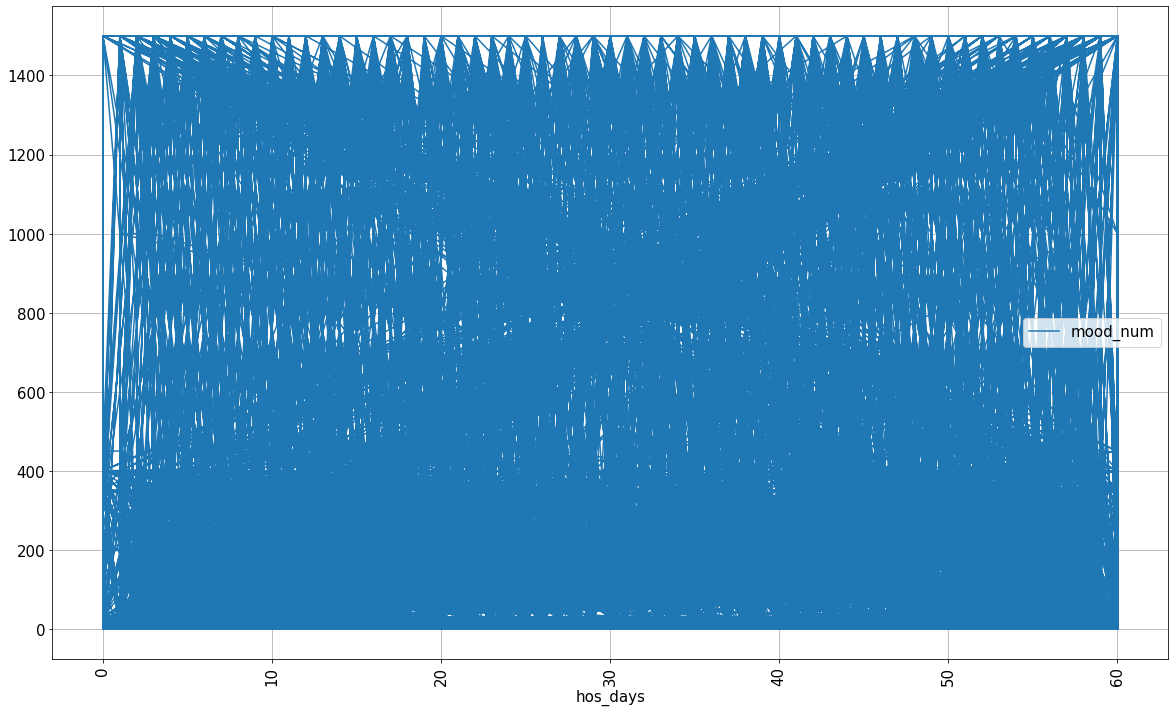

In [112]:
log_mood_num(df_ms)
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

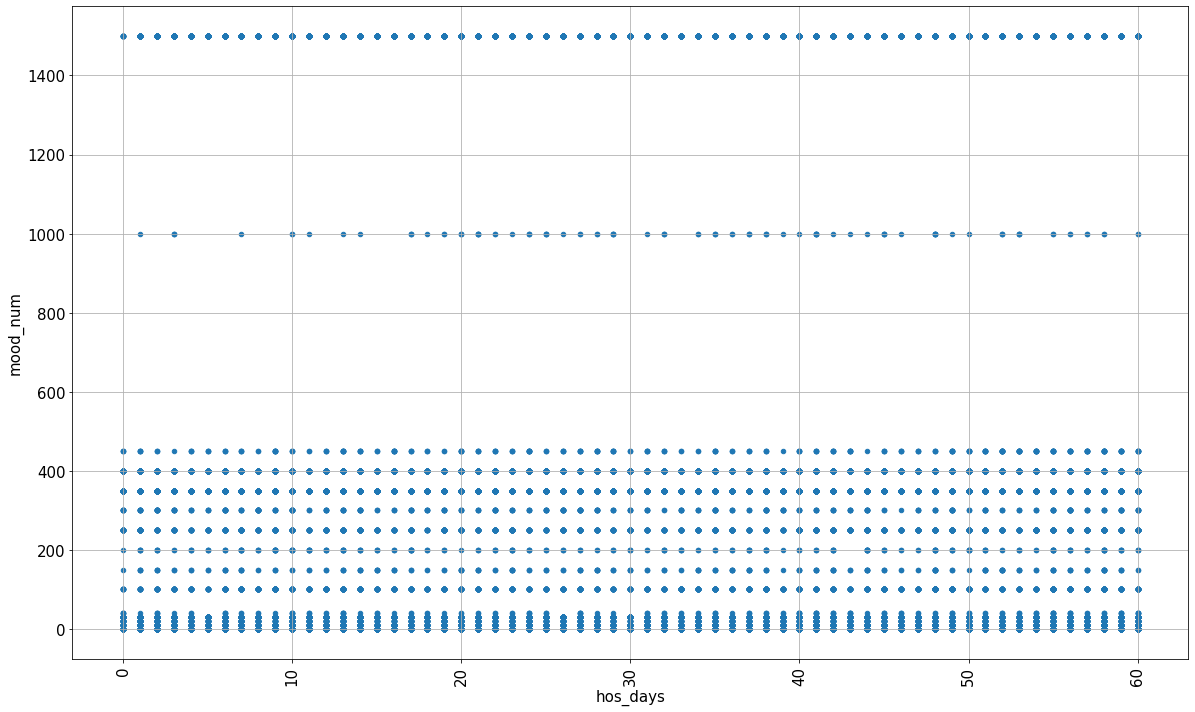

In [113]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot.scatter(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

In [64]:
# mood stripplot for Brain-snc patients
df_ms = df_ma[df_ma['Diagnosis'] == 'Brain-Snc']
df_ms

IDEHR EHRType        TimeStamp_Insert                     SOH  \
938      1497     EHR 2015-11-20 13:10:34.710 2015-11-20 12:24:20.237   
939      1497     EHR 2015-11-23 12:56:12.377 2015-11-20 12:24:20.237   
940      1497     EHR 2015-11-26 23:57:25.863 2015-11-20 12:24:20.237   
1307     1514     EHR 2015-12-01 00:43:08.990 2015-11-27 14:22:54.030   
1526     1530     EHR 2015-12-07 17:04:00.420 2015-12-07 12:28:10.193   
...       ...     ...                     ...                     ...   
101064  28878     AMB 2020-07-14 13:14:41.847 2020-06-15 11:44:10.767   
101065  28878     AMB 2020-07-16 13:02:18.307 2020-06-15 11:44:10.767   
101065  28878     AMB 2020-07-16 13:02:18.307 2020-06-15 11:44:10.767   
101065  28878     AMB 2020-07-16 13:02:18.307 2020-06-15 11:44:10.767   
101066  28878     AMB 2020-07-17 11:10:33.873 2020-06-15 11:44:10.767   

        survival_time_days  Diagnosis           mood_num  hos_days  
938                    6.0  Brain-Snc  closure in itself         0  
939                    6.0  Brain-Snc  closure in itself         3  
940                    6.0  Brain-Snc                NaN         6  
1307                   3.0  Brain-Snc                NaN         3  
1526                   3.0  Brain-Snc             apathy         0  
...                    ...        ...                ...       ...  
101064                32.0  Brain-Snc               fear        29  
101065                32.0  Brain-Snc             apathy        31  
101065                32.0  Brain-Snc            despair        31  
101065                32.0  Brain-Snc               fear        31  
101066                32.0  Brain-Snc  closure in itself        31  

[7152 rows x 8 columns]

In [65]:
len(df_ms.IDEHR.unique())

218

<Figure size 1440x864 with 0 Axes>

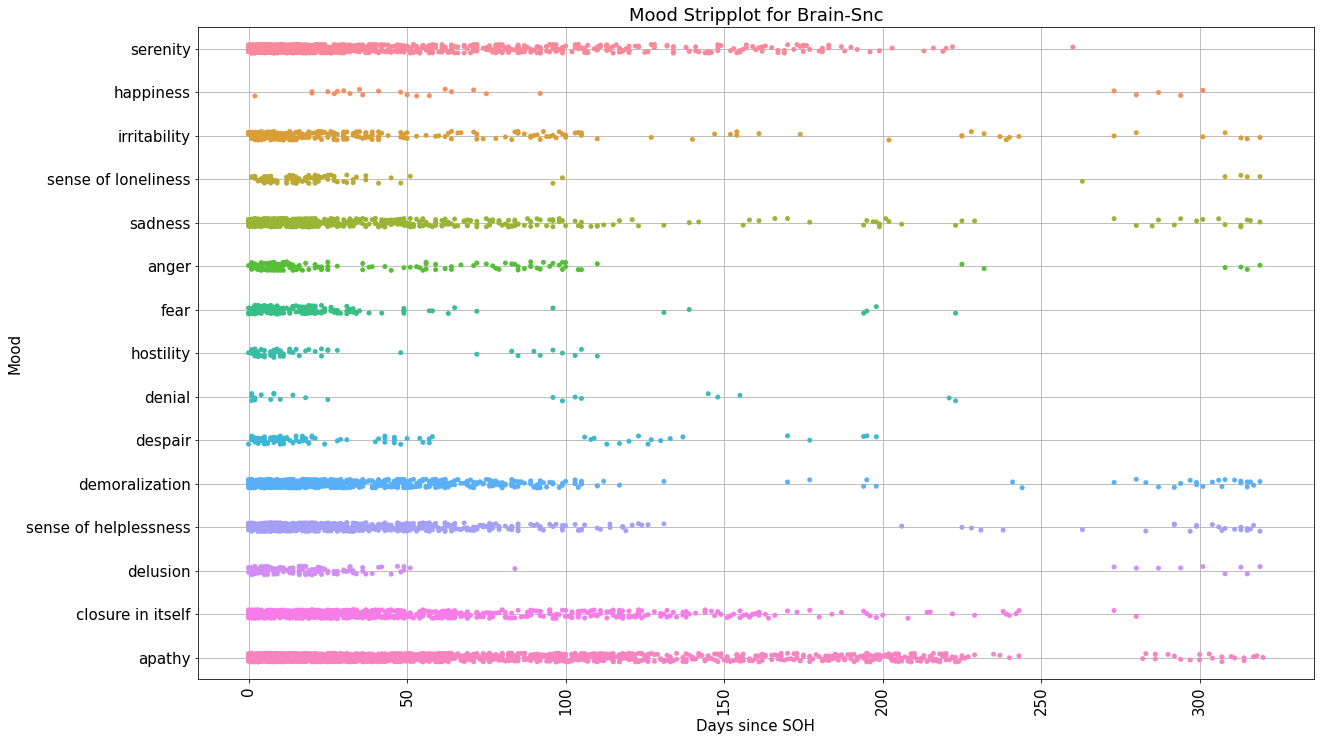

In [66]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
ax = sns.stripplot(x='hos_days', y='mood_num', data=df_ms, orient='h', order=cats)
ax.set_xlabel('Days since SOH')
ax.set_ylabel('Mood')
ax.set_title('Mood Stripplot for Brain-Snc')
plt.xticks(rotation=90)
plt.grid()
plt.savefig("./graphs/referral analysis/mood_brain_snc.png", bbox_inches='tight')
plt.show()

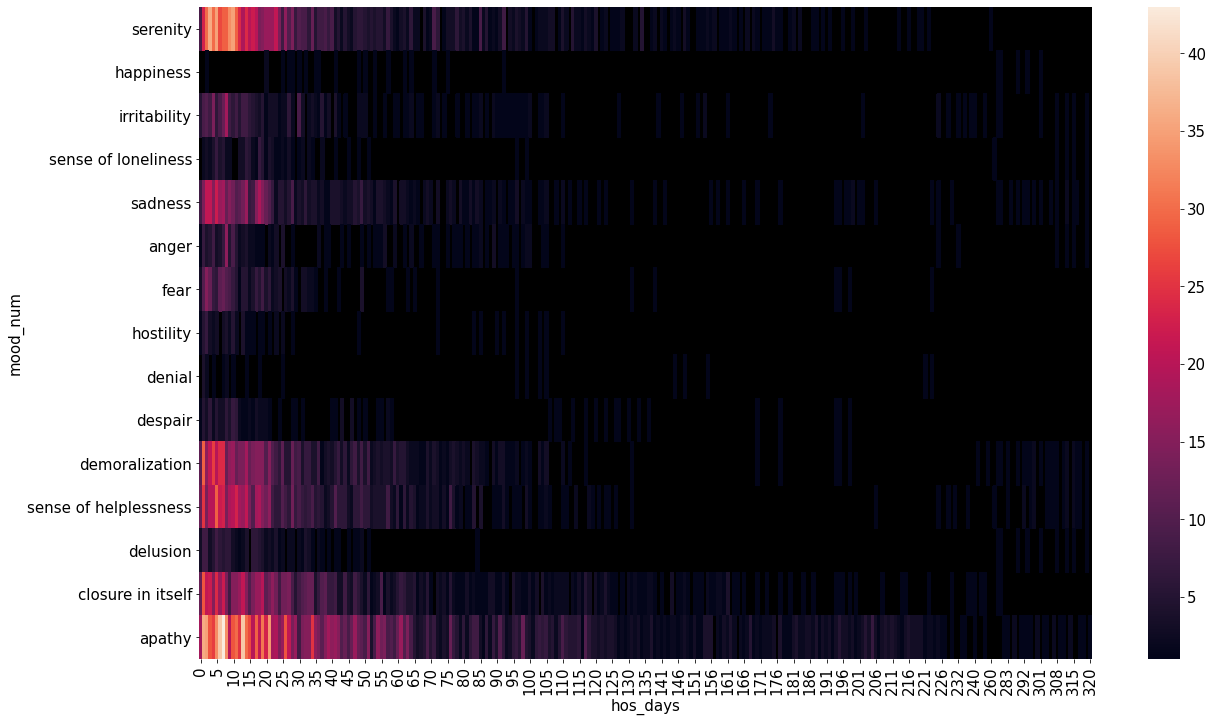

In [67]:
# heatmap
df_hm = df_ms[['mood_num', 'hos_days']].reset_index(drop=True)
df_hm = df_hm.groupby(['mood_num', 'hos_days']).size().to_frame('size').reset_index()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
df_hm['mood_num'] = pd.Categorical(df_hm['mood_num'], categories=cats, ordered=True)
df_hm = df_hm.pivot(index='mood_num', columns='hos_days', values='size')
pat_hm = sns.heatmap(df_hm)
pat_hm.set_facecolor('xkcd:black')

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


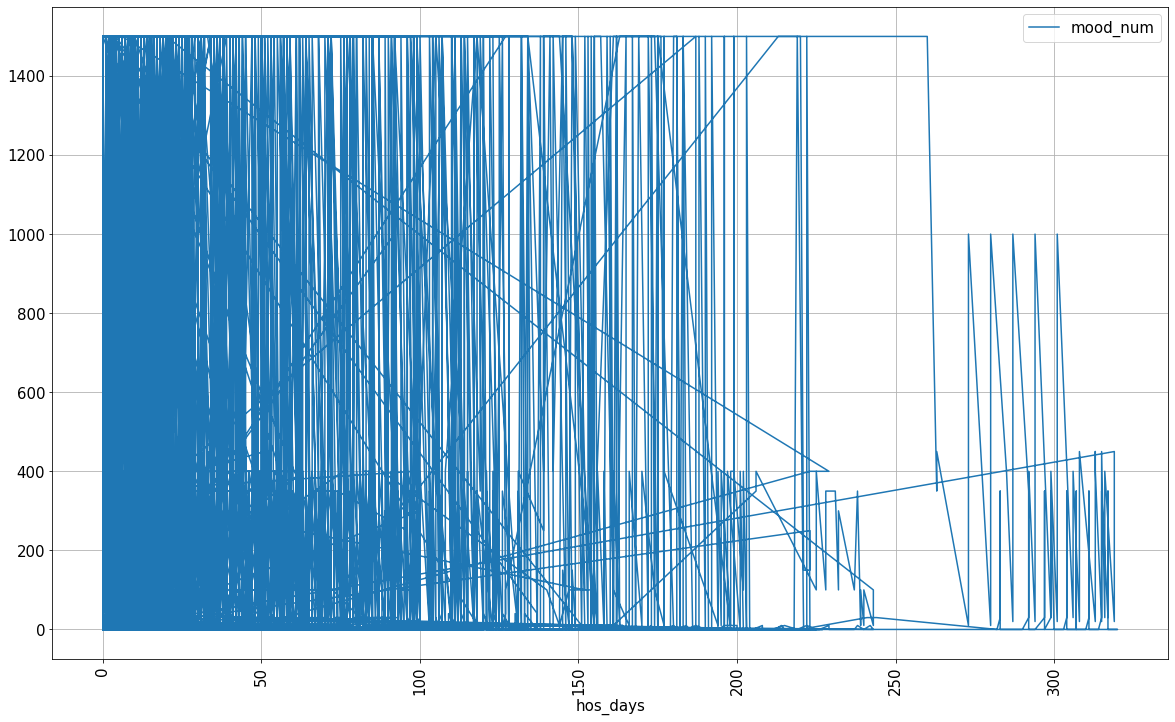

In [68]:
log_mood_num(df_ms)
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

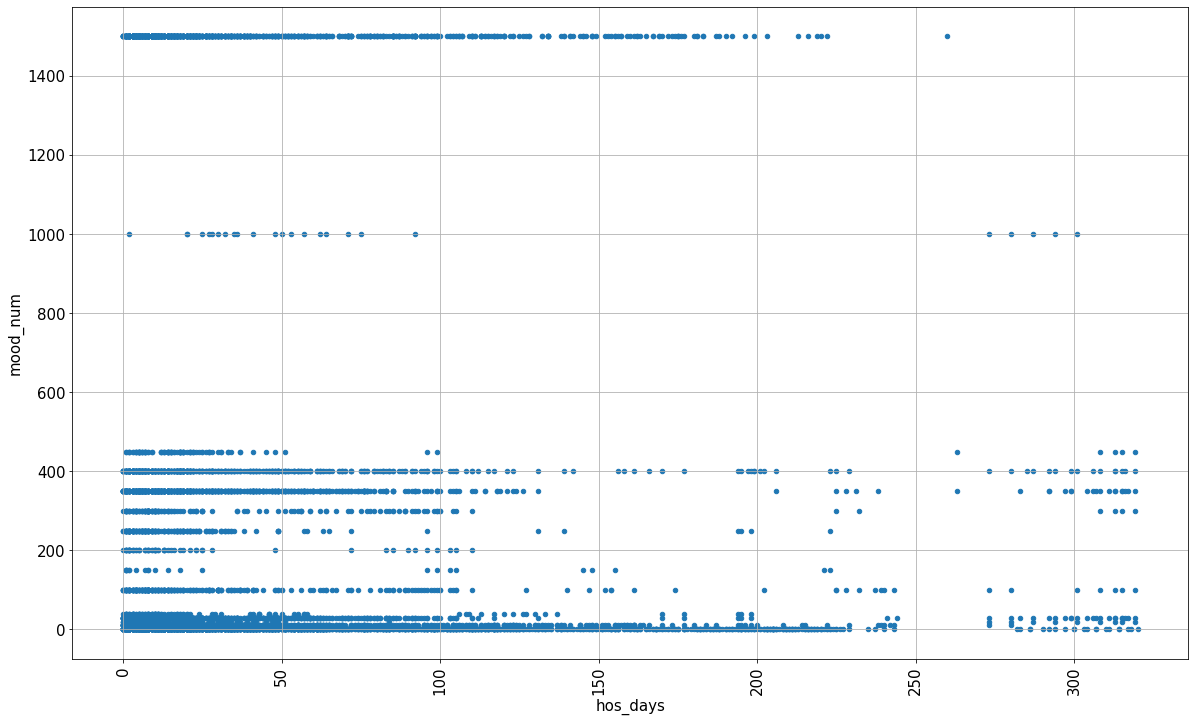

In [69]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot.scatter(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

In [70]:
# mood stripplot for Lymphoma patients
df_ms = df_ma[df_ma['Diagnosis'] == 'Lymphoma']
df_ms

IDEHR EHRType        TimeStamp_Insert                     SOH  \
2006     1577     EHR 2016-01-02 14:01:25.457 2016-01-02 13:38:12.203   
2007     1577     EHR 2016-01-02 14:12:52.047 2016-01-02 13:38:12.203   
2008     1577     EHR 2016-01-03 11:18:38.203 2016-01-02 13:38:12.203   
2009     1577     EHR 2016-01-03 13:02:06.070 2016-01-02 13:38:12.203   
2010     1577     EHR 2016-01-03 21:29:54.257 2016-01-02 13:38:12.203   
...       ...     ...                     ...                     ...   
101190  29132     AMB 2020-07-04 09:57:11.103 2020-06-29 09:24:51.910   
101191  29132     AMB 2020-07-06 16:33:58.833 2020-06-29 09:24:51.910   
101192  29132     AMB 2020-07-07 09:36:07.340 2020-06-29 09:24:51.910   
101192  29132     AMB 2020-07-07 09:36:07.340 2020-06-29 09:24:51.910   
101193  29132     AMB 2020-07-09 15:06:50.947 2020-06-29 09:24:51.910   

        survival_time_days Diagnosis           mood_num  hos_days  
2006                  20.0  Lymphoma  closure in itself         0  
2007                  20.0  Lymphoma  closure in itself         0  
2008                  20.0  Lymphoma           serenity         0  
2009                  20.0  Lymphoma  closure in itself         0  
2010                  20.0  Lymphoma           serenity         1  
...                    ...       ...                ...       ...  
101190                10.0  Lymphoma  closure in itself         5  
101191                10.0  Lymphoma     demoralization         7  
101192                10.0  Lymphoma             apathy         8  
101192                10.0  Lymphoma  closure in itself         8  
101193                10.0  Lymphoma     demoralization        10  

[2937 rows x 8 columns]

In [71]:
len(df_ms.IDEHR.unique())

132

<Figure size 1440x864 with 0 Axes>

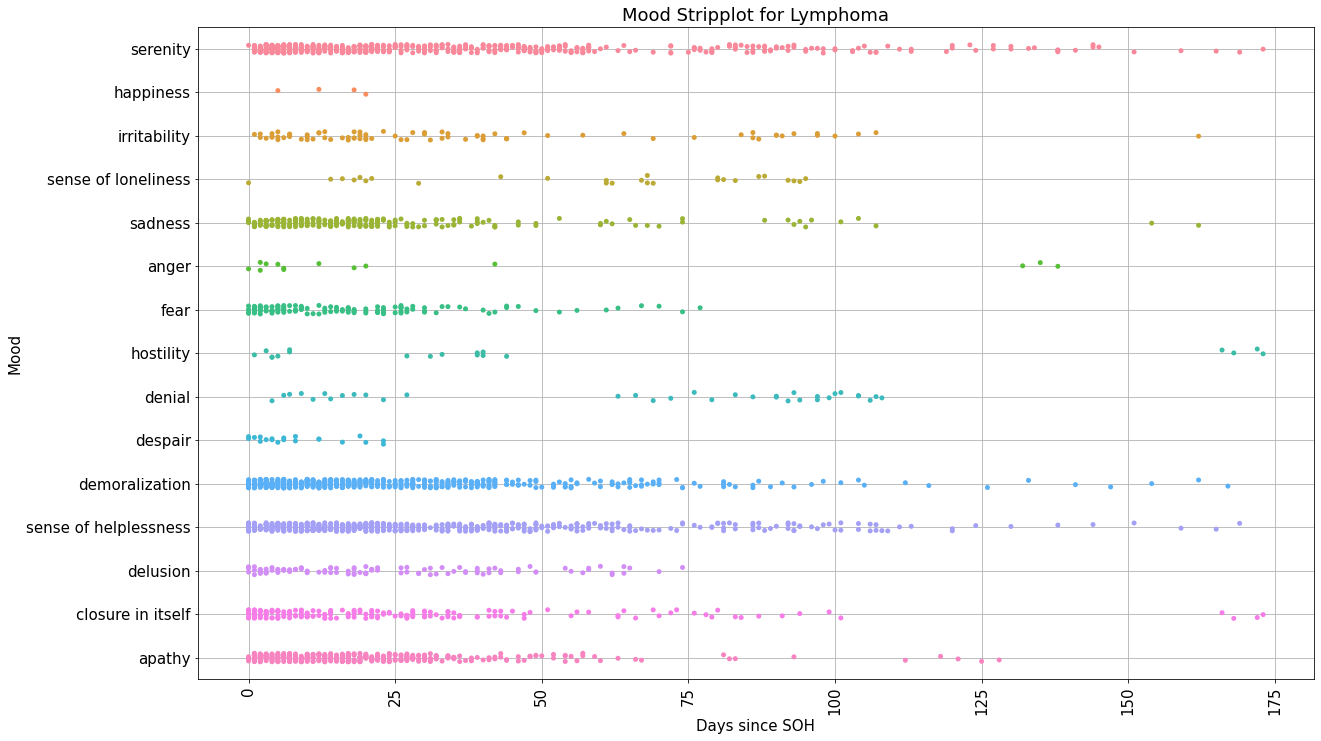

In [72]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
ax = sns.stripplot(x='hos_days', y='mood_num', data=df_ms, orient='h', order=cats)
ax.set_xlabel('Days since SOH')
ax.set_ylabel('Mood')
ax.set_title('Mood Stripplot for Lymphoma')
plt.xticks(rotation=90)
plt.grid()
plt.savefig("./graphs/referral analysis/mood_lymphoma.png", bbox_inches='tight')
plt.show()

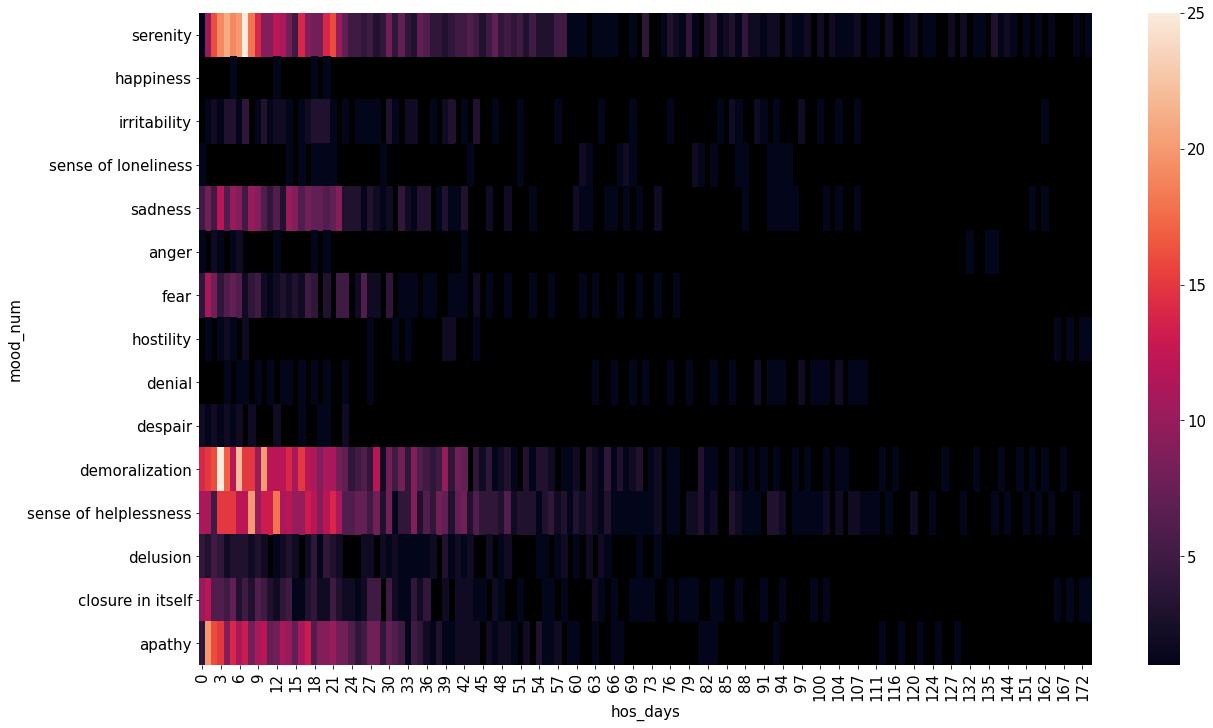

In [73]:
# heatmap
df_hm = df_ms[['mood_num', 'hos_days']].reset_index(drop=True)
df_hm = df_hm.groupby(['mood_num', 'hos_days']).size().to_frame('size').reset_index()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
df_hm['mood_num'] = pd.Categorical(df_hm['mood_num'], categories=cats, ordered=True)
df_hm = df_hm.pivot(index='mood_num', columns='hos_days', values='size')
pat_hm = sns.heatmap(df_hm)
pat_hm.set_facecolor('xkcd:black')

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


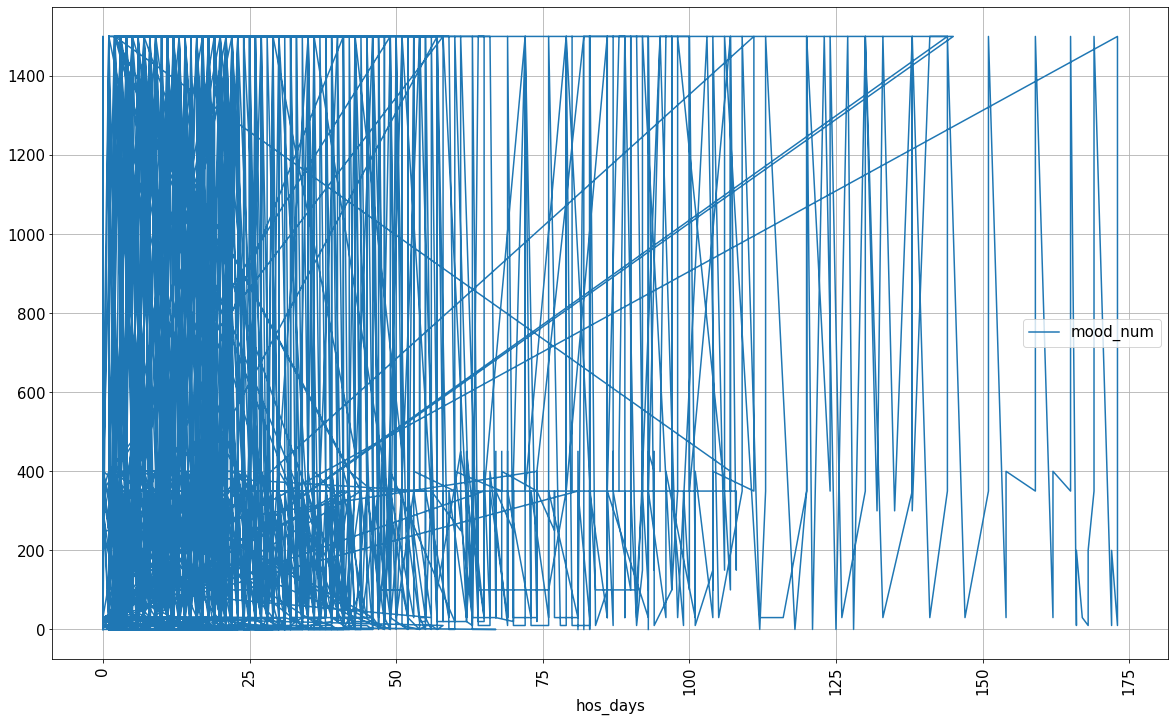

In [74]:
log_mood_num(df_ms)
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

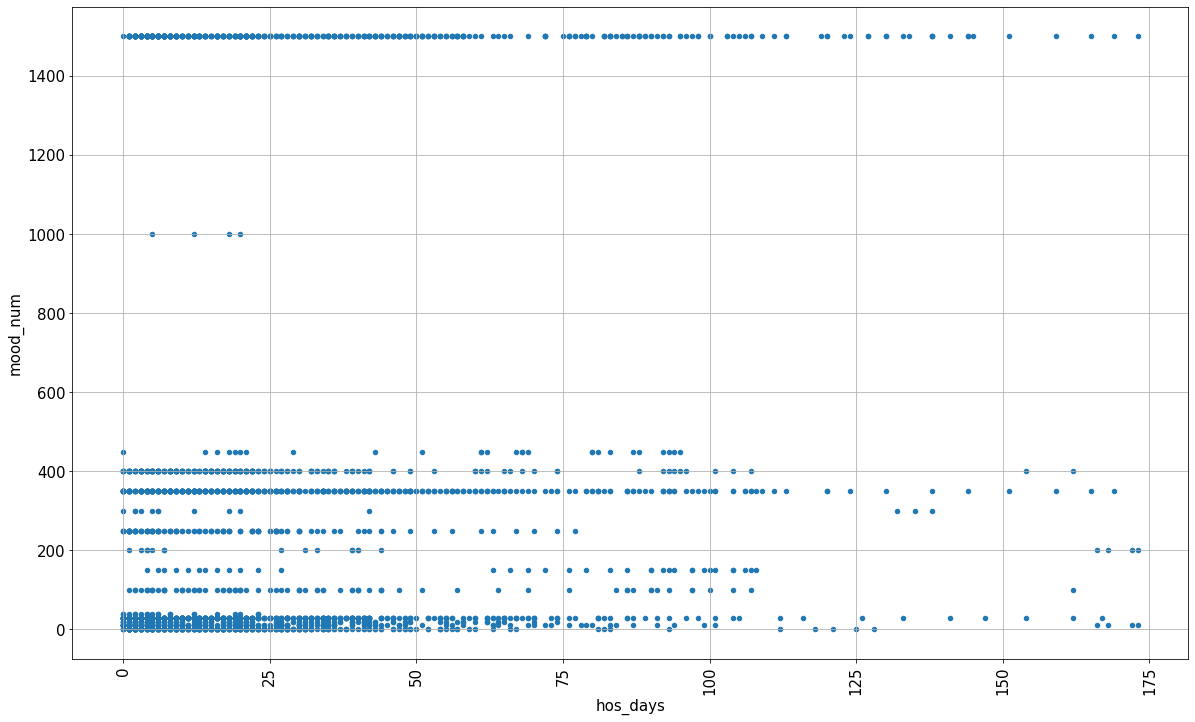

In [75]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot.scatter(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

In [76]:
# mood stripplot for Liver patients
df_ms = df_ma[df_ma['Diagnosis'] == 'Liver-Biliary']
df_ms

IDEHR EHRType        TimeStamp_Insert                     SOH  \
621      1461     EHR 2015-11-04 06:03:09.493 2015-10-30 12:34:59.017   
845      1490     EHR 2015-11-19 12:53:16.270 2015-11-16 12:50:52.100   
846      1490     EHR 2015-11-21 17:52:28.903 2015-11-16 12:50:52.100   
999      1503     EHR 2015-11-24 09:15:13.100 2015-11-23 13:52:58.590   
1773     1538     EHR 2015-12-11 14:10:09.410 2015-12-11 10:45:52.370   
...       ...     ...                     ...                     ...   
101151  29045     AMB 2020-06-29 09:23:30.360 2020-06-23 18:56:08.063   
101152  29045     AMB 2020-06-30 14:34:57.753 2020-06-23 18:56:08.063   
101153  29045     AMB 2020-06-30 14:36:50.340 2020-06-23 18:56:08.063   
101154  29045     AMB 2020-07-01 10:22:24.627 2020-06-23 18:56:08.063   
101154  29045     AMB 2020-07-01 10:22:24.627 2020-06-23 18:56:08.063   

        survival_time_days      Diagnosis           mood_num  hos_days  
621                    4.0  Liver-Biliary                NaN         4  
845                    5.0  Liver-Biliary               fear         3  
846                    5.0  Liver-Biliary                NaN         5  
999                    0.0  Liver-Biliary                NaN         0  
1773                   3.0  Liver-Biliary  closure in itself         0  
...                    ...            ...                ...       ...  
101151                10.0  Liver-Biliary             apathy         5  
101152                10.0  Liver-Biliary             apathy         6  
101153                10.0  Liver-Biliary             apathy         6  
101154                10.0  Liver-Biliary             apathy         7  
101154                10.0  Liver-Biliary  closure in itself         7  

[8990 rows x 8 columns]

In [77]:
len(df_ms.IDEHR.unique())

362

<Figure size 1440x864 with 0 Axes>

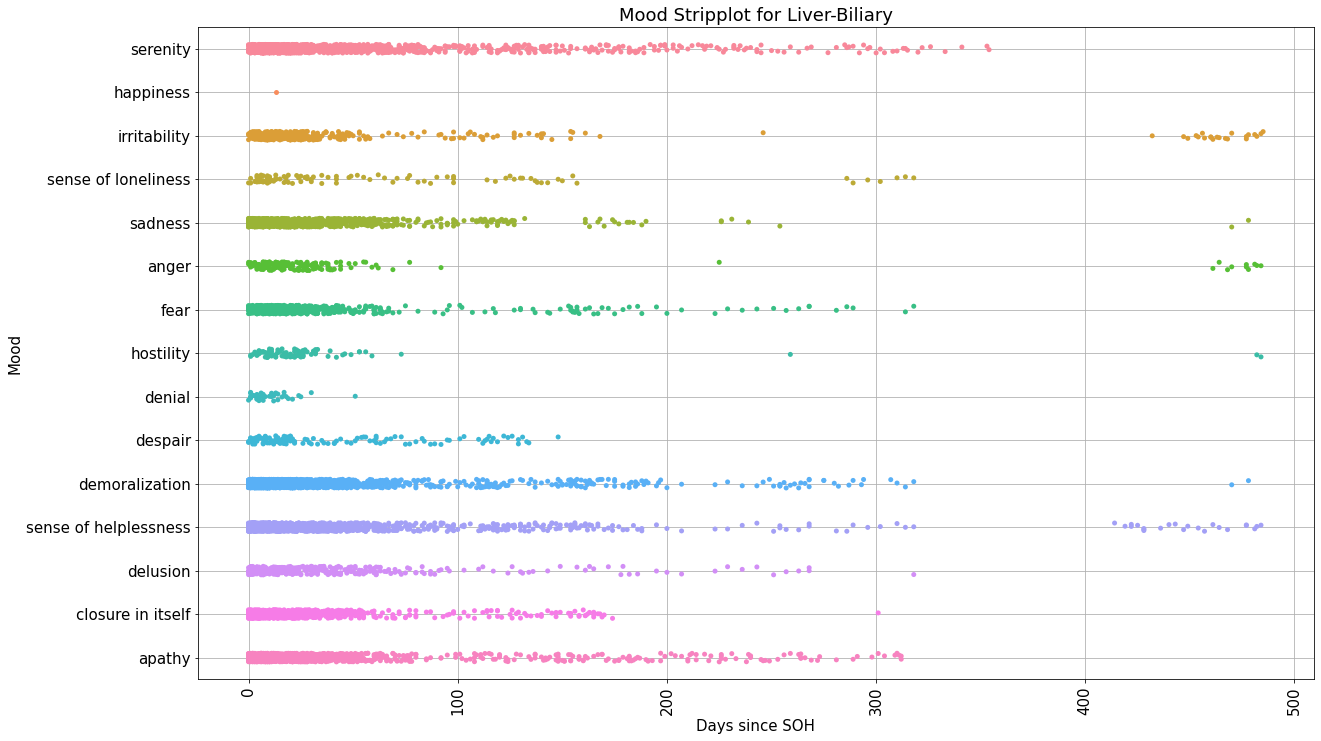

In [78]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
ax = sns.stripplot(x='hos_days', y='mood_num', data=df_ms, orient='h', order=cats)
ax.set_xlabel('Days since SOH')
ax.set_ylabel('Mood')
ax.set_title('Mood Stripplot for Liver-Biliary')
plt.xticks(rotation=90)
plt.grid()
plt.savefig("./graphs/referral analysis/mood_liver.png", bbox_inches='tight')
plt.show()

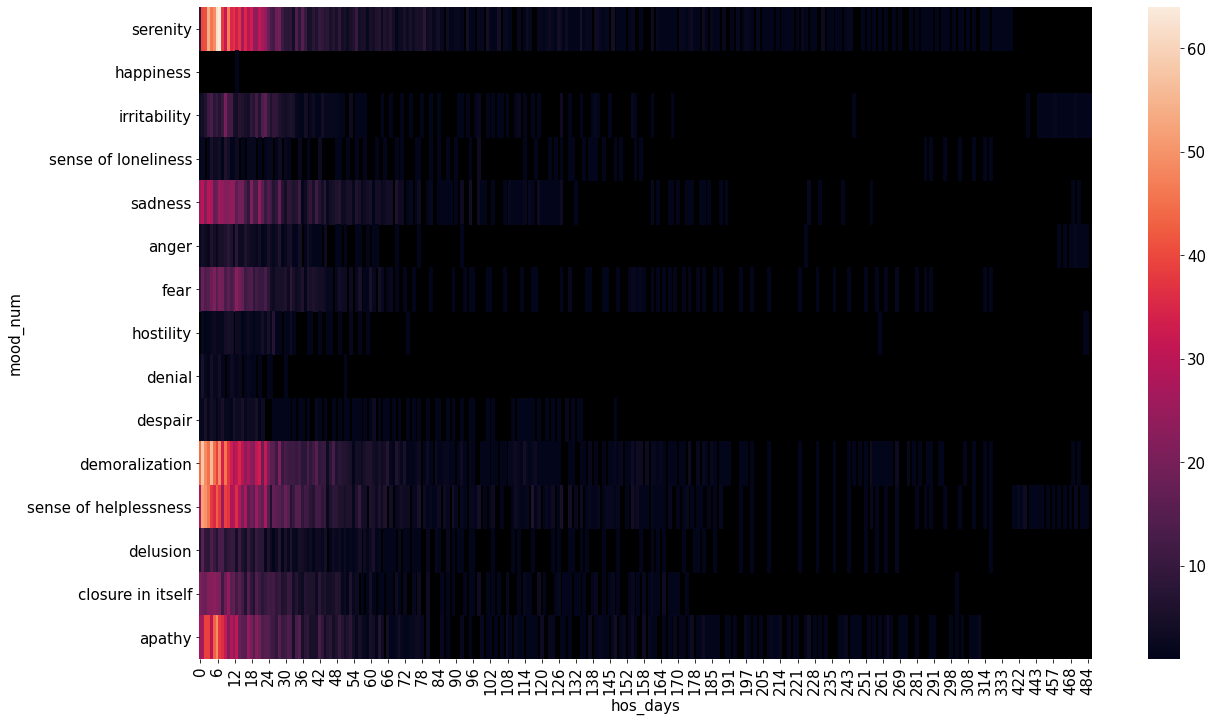

In [79]:
# heatmap
df_hm = df_ms[['mood_num', 'hos_days']].reset_index(drop=True)
df_hm = df_hm.groupby(['mood_num', 'hos_days']).size().to_frame('size').reset_index()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
df_hm['mood_num'] = pd.Categorical(df_hm['mood_num'], categories=cats, ordered=True)
df_hm = df_hm.pivot(index='mood_num', columns='hos_days', values='size')
pat_hm = sns.heatmap(df_hm)
pat_hm.set_facecolor('xkcd:black')

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


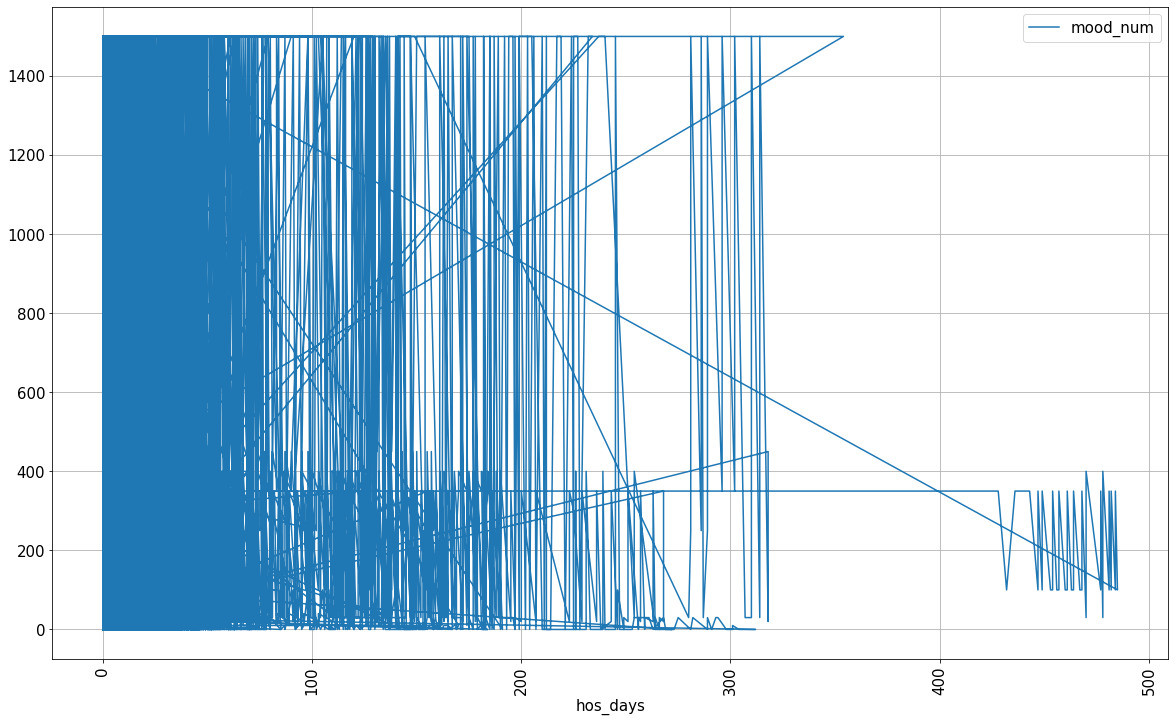

In [80]:
log_mood_num(df_ms)
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

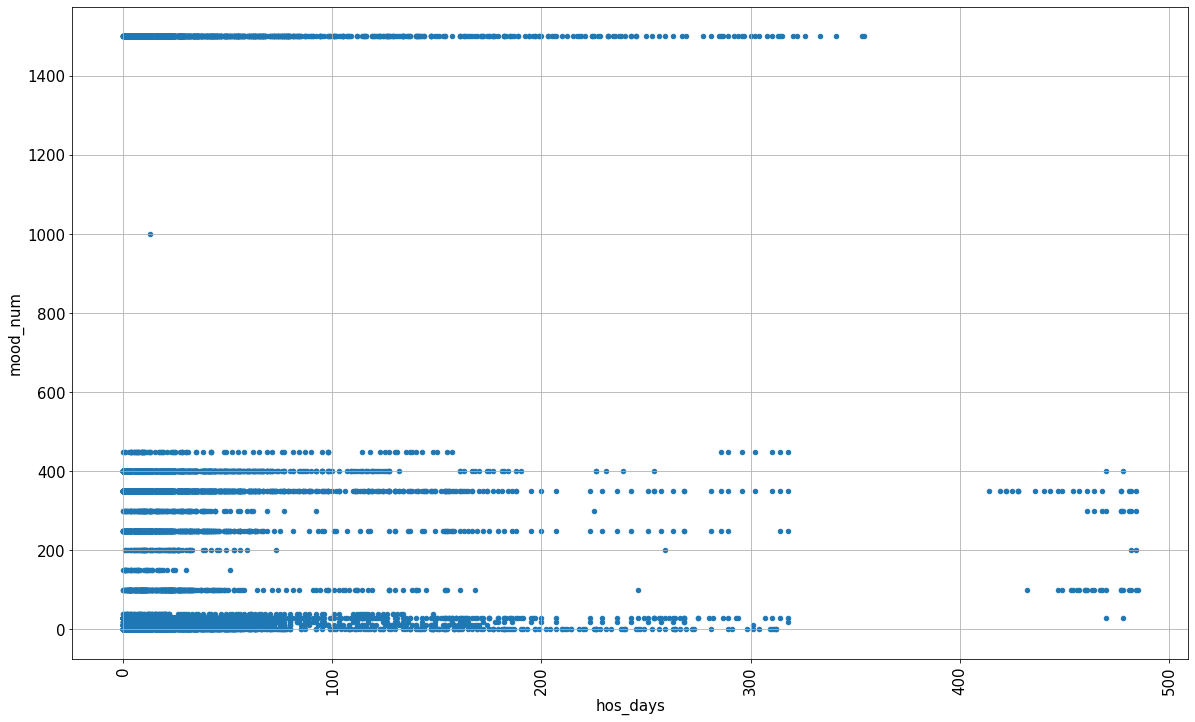

In [81]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot.scatter(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

In [124]:
# mood stripplot for Prostate patients
df_ms = df_ma[df_ma['Diagnosis'] == 'Prostate']
df_ms

IDEHR EHRType        TimeStamp_Insert                     SOH  \
2147     1586     EHR 2016-01-09 12:51:57.780 2016-01-08 15:13:22.220   
2148     1586     EHR 2016-01-09 17:20:55.707 2016-01-08 15:13:22.220   
2148     1586     EHR 2016-01-09 17:20:55.707 2016-01-08 15:13:22.220   
2149     1586     EHR 2016-01-10 12:02:04.147 2016-01-08 15:13:22.220   
2150     1586     EHR 2016-01-10 12:11:39.353 2016-01-08 15:13:22.220   
...       ...     ...                     ...                     ...   
100111  28012     AMB 2020-05-04 11:07:35.867 2020-04-28 16:05:15.887   
100112  28012     AMB 2020-05-05 12:52:19.333 2020-04-28 16:05:15.887   
100113  28012     AMB 2020-05-07 12:38:29.333 2020-04-28 16:05:15.887   
100114  28012     AMB 2020-05-08 07:39:35.787 2020-04-28 16:05:15.887   
100115  28012     AMB 2020-05-08 16:28:05.723 2020-04-28 16:05:15.887   

        survival_time_days Diagnosis               mood_num  hos_days  
2147                   4.0  Prostate      closure in itself         0  
2148                   4.0  Prostate                 apathy         1  
2148                   4.0  Prostate      closure in itself         1  
2149                   4.0  Prostate      closure in itself         1  
2150                   4.0  Prostate                   fear         1  
...                    ...       ...                    ...       ...  
100111                10.0  Prostate                 apathy         5  
100112                10.0  Prostate  sense of helplessness         6  
100113                10.0  Prostate                 apathy         8  
100114                10.0  Prostate  sense of helplessness         9  
100115                10.0  Prostate                 apathy        10  

[5918 rows x 8 columns]

In [125]:
len(df_ms.IDEHR.unique())

187

In [126]:
df_ms = df_ms[df_ms['survival_time_days'] >= 20]

In [127]:
df_ms = df_ms[df_ms['hos_days'] <= 20]

In [130]:
len(df_ms.IDEHR.unique())

86

<Figure size 1440x864 with 0 Axes>

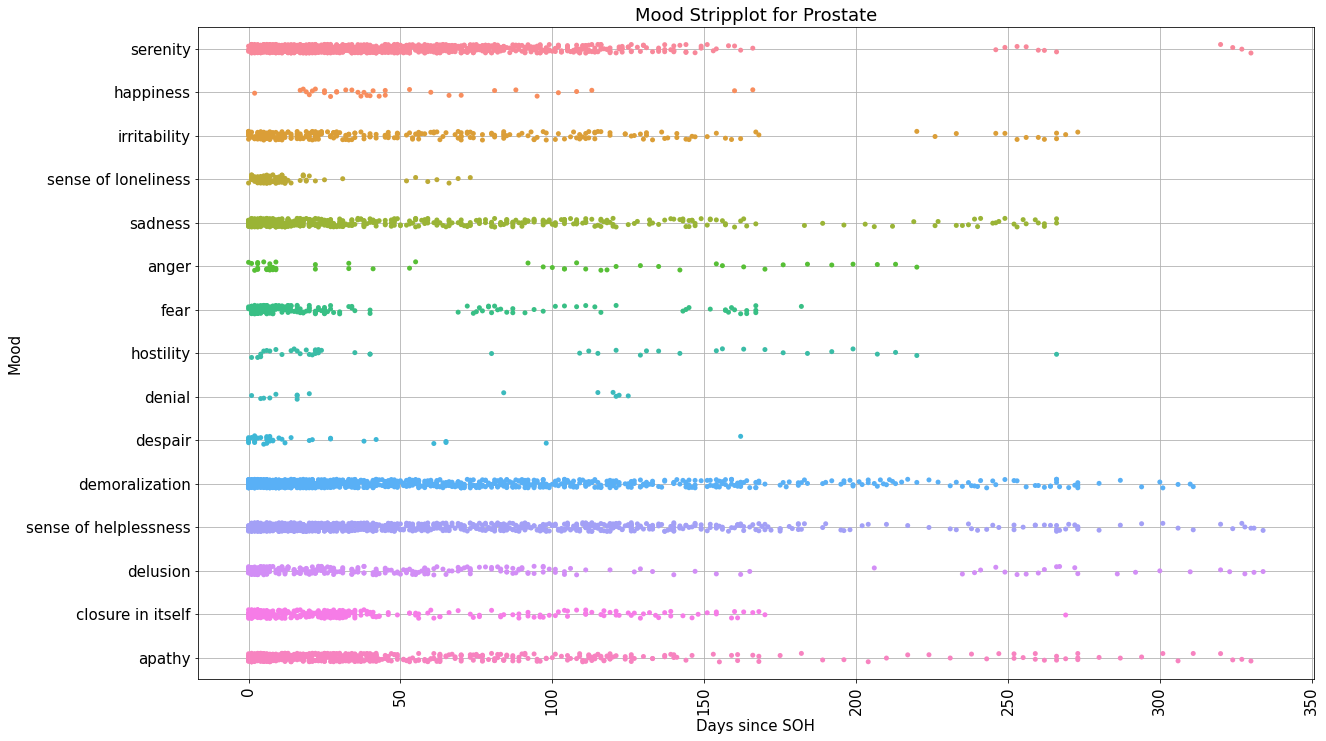

In [85]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
fig, ax = plt.subplots()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
ax = sns.stripplot(x='hos_days', y='mood_num', data=df_ms, orient='h', order=cats)
ax.set_xlabel('Days since SOH')
ax.set_ylabel('Mood')
ax.set_title('Mood Stripplot for Prostate')
plt.xticks(rotation=90)
plt.grid()
plt.savefig("./graphs/referral analysis/mood_prostate.png", bbox_inches='tight')
plt.show()

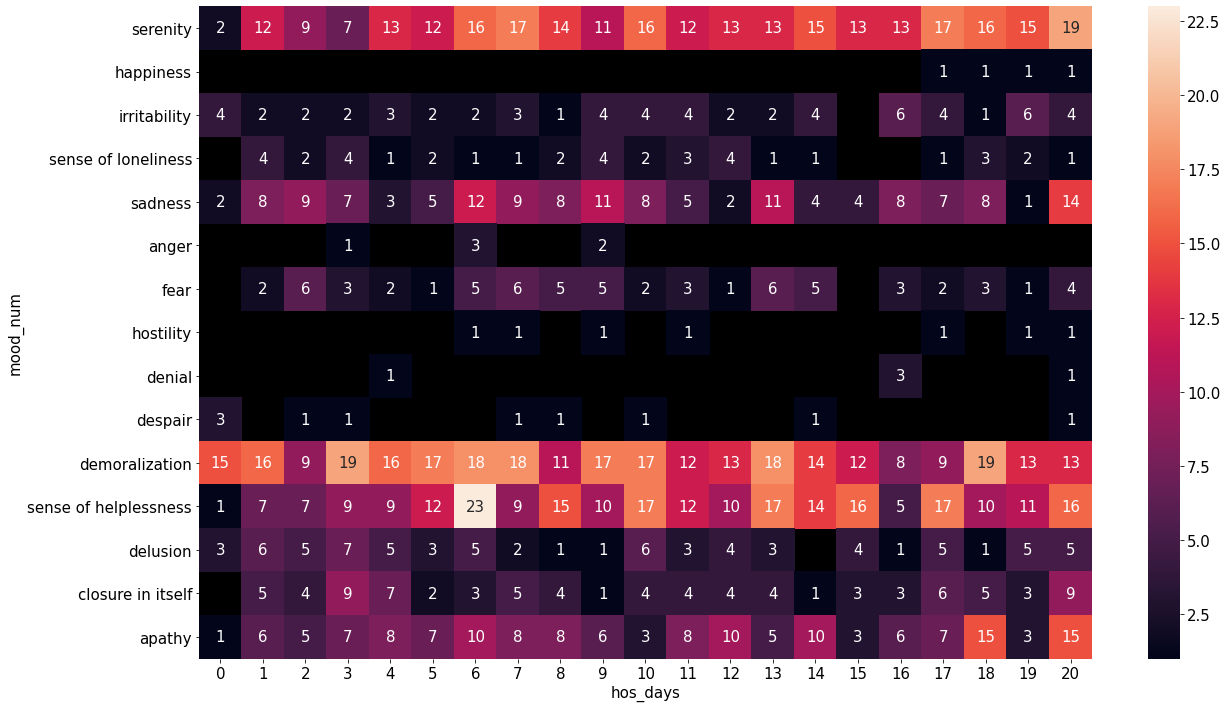

In [129]:
# heatmap
df_hm = df_ms[['mood_num', 'hos_days']].reset_index(drop=True)
df_hm = df_hm.groupby(['mood_num', 'hos_days']).size().to_frame('size').reset_index()
cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
cats.reverse()
df_hm['mood_num'] = pd.Categorical(df_hm['mood_num'], categories=cats, ordered=True)
df_hm = df_hm.pivot(index='mood_num', columns='hos_days', values='size')
pat_hm = sns.heatmap(df_hm, annot=True)
pat_hm.set_facecolor('xkcd:black')
# mention number of patients in the heatmap

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


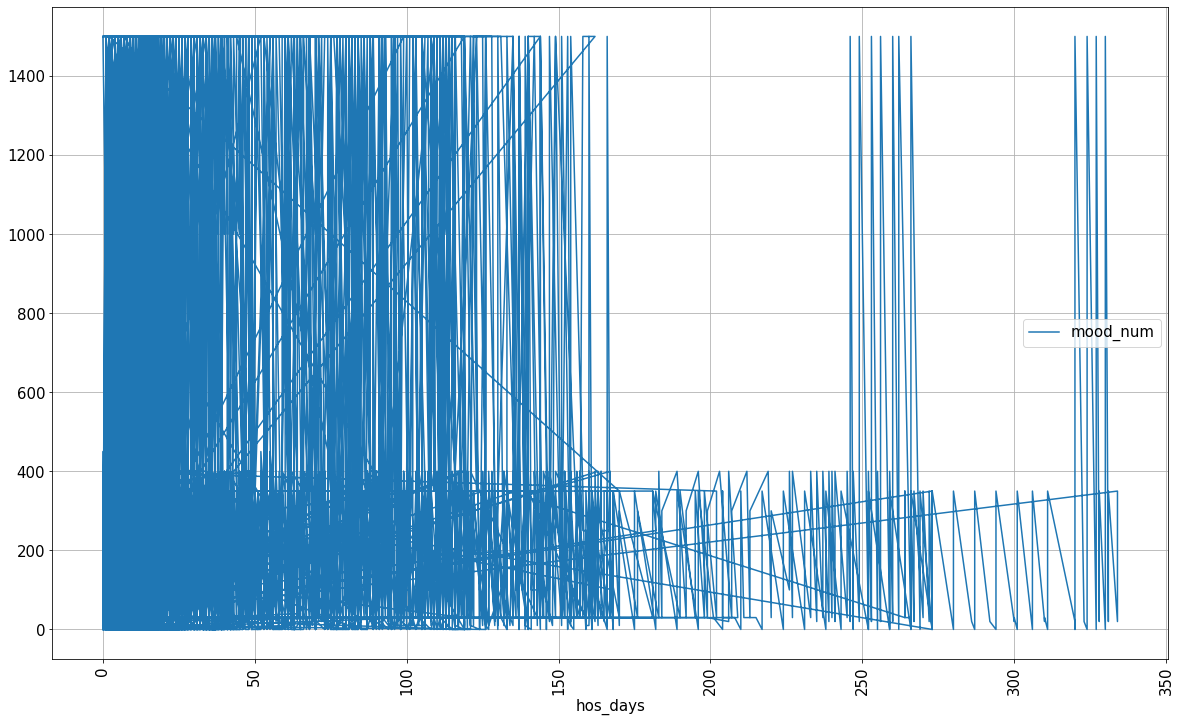

In [87]:
log_mood_num(df_ms)
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

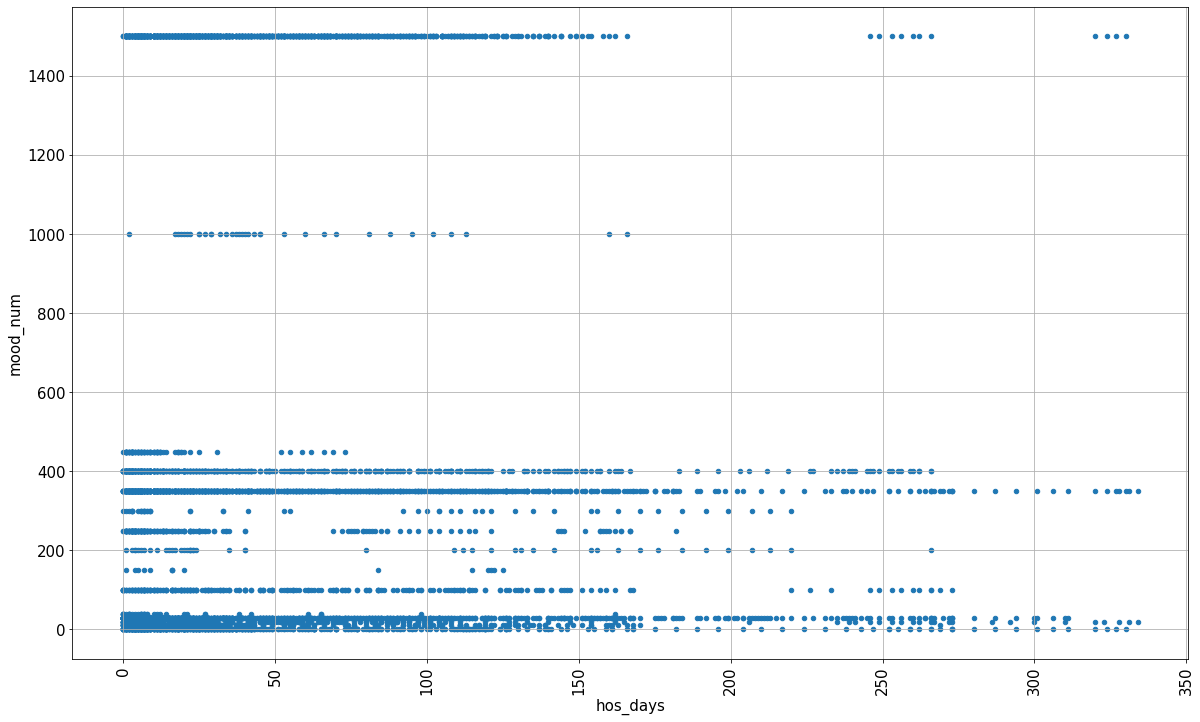

In [88]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
df_ms.plot.scatter(x='hos_days', y='mood_num')
# ax.set_xlabel('No. of days since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for survival times <= 30 days')
plt.xticks(rotation=90)
plt.grid()
# plt.savefig("./graphs/referral analysis/mood_less_than_30_days.png", bbox_inches='tight')
# plt.show()

In [89]:
ids = df_ms.IDEHR.unique()

      IDEHR EHRType        TimeStamp_Insert                     SOH  \
2147   1586     EHR 2016-01-09 12:51:57.780 2016-01-08 15:13:22.220   
2148   1586     EHR 2016-01-09 17:20:55.707 2016-01-08 15:13:22.220   
2148   1586     EHR 2016-01-09 17:20:55.707 2016-01-08 15:13:22.220   
2149   1586     EHR 2016-01-10 12:02:04.147 2016-01-08 15:13:22.220   
2150   1586     EHR 2016-01-10 12:11:39.353 2016-01-08 15:13:22.220   
2151   1586     EHR 2016-01-11 13:25:44.873 2016-01-08 15:13:22.220   
2152   1586     EHR 2016-01-11 17:37:00.103 2016-01-08 15:13:22.220   
2152   1586     EHR 2016-01-11 17:37:00.103 2016-01-08 15:13:22.220   
2153   1586     EHR 2016-01-12 10:34:26.457 2016-01-08 15:13:22.220   
2154   1586     EHR 2016-01-12 11:30:44.383 2016-01-08 15:13:22.220   
2155   1586     EHR 2016-01-12 17:48:25.013 2016-01-08 15:13:22.220   
2155   1586     EHR 2016-01-12 17:48:25.013 2016-01-08 15:13:22.220   
2156   1586     EHR 2016-01-13 13:57:00.660 2016-01-08 15:13:22.220   

     

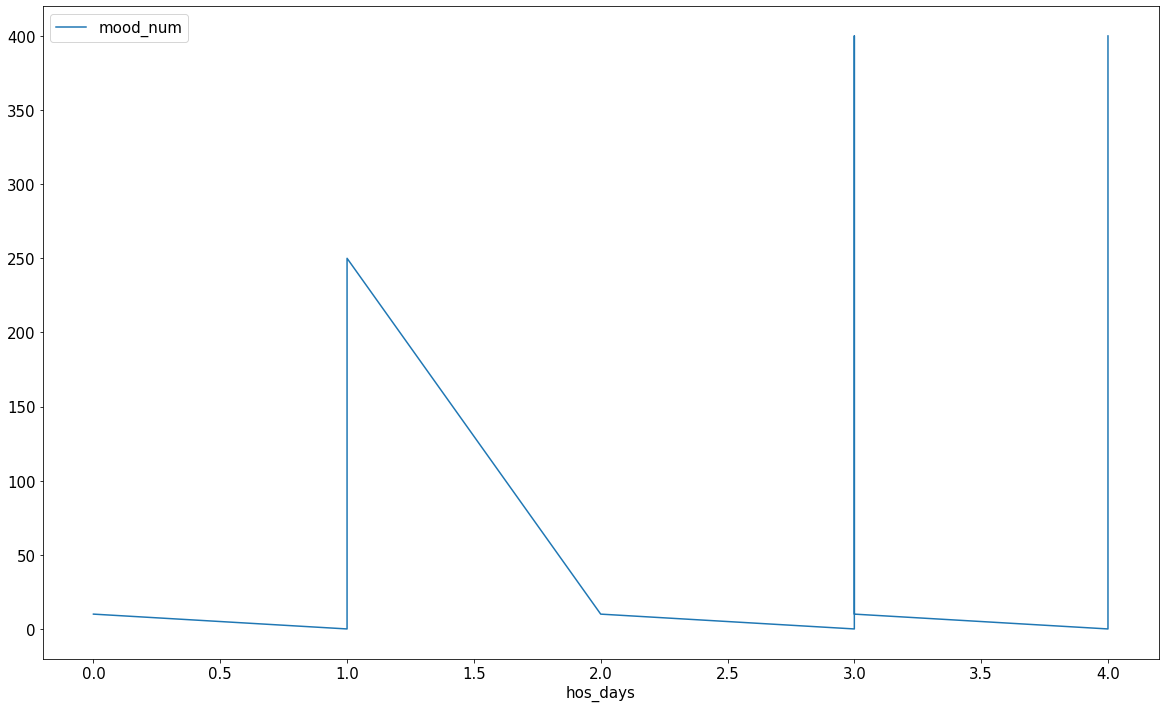

In [90]:
for i in ids:
    df_ms[df_ms['IDEHR'] == i].plot(x='hos_days', y='mood_num')
    print(df_ms[df_ms['IDEHR'] == i])
    break

In [91]:
# PROTOTYPING
# df1 = df_ma.loc[df_ma['IDEHR'] == 1382]
# df1

In [92]:
# df1.mood.unique()

In [93]:
# considering only the first mood entry for each timestamp
# df1['mood_num'] = df1.mood.str.findall('#(\d\d)').to_frame()
# df1['mood_num'] = df1['mood_num'].apply(lambda x: np.nan if not x else int(x[0]))
# df1 = df1[['TimeStamp_Insert', 'mood_num']]
# df1

In [94]:
# scatterplot of mood vs. time for a single patient
# plt.rcParams['figure.figsize'] = [20, 12]
# matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
# ax = sns.scatterplot(x='TimeStamp_Insert', y='mood_num', data=df1)
# ax.set_xlabel('Time')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Trajectory for IDEHR=1382')
# ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
# ax.set_yticklabels(['apathy', 'closure in itself', 'delusion', 'demoralization', 'despair', 'irritability', 'denial', 'hostility', 'fear', 'anger', 'sense of helplessness', 'sadness', 'sense of loneliness', 'happiness', 'serenity'])
# plt.xticks(rotation=90)
# plt.grid()
# plt.savefig("./graphs/referral analysis/mood_1382.png", bbox_inches='tight')
# plt.show()

In [95]:
# considering all mood entries for each timestamp
# df1 = df_ma.loc[df_ma['IDEHR'] == 1382]
# df1['mood_num'] = df1.mood.str.findall('#(\d\d)').to_frame()
# df1['mood_num'] = df1['mood_num'].apply(lambda x: np.nan if not x else [int(i) for i in x])
# df1 = df1[['TimeStamp_Insert', 'mood_num']]
# df1

In [96]:
# df1 = df1.explode('mood_num')
# df1

In [97]:
# df1['Initial'] = df1.iloc[0, 0]
# pd.to_datetime(df1['TimeStamp_Insert'])
# df1['TimeDelta'] = pd.to_timedelta(df1.TimeStamp_Insert - df1.Initial).dt.days
# df1.astype({'TimeDelta': 'int32'}).dtypes
# df1

In [98]:
# conv_mood_num(df1)

In [99]:
# df1

In [100]:
# scatterplot of mood vs. time for a single patient
# plt.rcParams['figure.figsize'] = [20, 12]
# matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
# ax = sns.scatterplot(x='TimeStamp_Insert', y='mood_num', data=df1)
# ax.set_xlabel('Time')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Scatterplot for IDEHR=1382')
# # ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
# # ax.set_yticklabels(['apathy', 'closure in itself', 'delusion', 'demoralization', 'despair', 'irritability', 'denial', 'hostility', 'fear', 'anger', 'sense of helplessness', 'sadness', 'sense of loneliness', 'happiness', 'serenity'])
# # ax.set_xticks(ax.get_xticks()[::2])
# plt.xticks(rotation=90)
# plt.grid()
# plt.savefig("./graphs/referral analysis/explode_mood_1382.png", bbox_inches='tight')
# plt.show()

In [101]:
# scatterplot of mood vs. time for a single patient using updated mood ordering
# plt.rcParams['figure.figsize'] = [20, 12]
# matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
# cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
# cats.reverse()
# ax = sns.stripplot(x='TimeDelta', y='mood_num', data=df1, orient='h', order=cats)
# ax.set_xlabel('Time (in days)')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for IDEHR=1382')
# # ax.set_yticks([0, 1, 2, 10, 3, 4, 6, 7, 8, 9, 11, 12, 5, 13, 14])
# # ax.set_yticks([0, 1, 2, 10, 3, 4, 6, 7, 8, 9, 11, 12, 5, 13, 14])
# # ax.set_yticks(['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity'])
# # ax.set_xticks(ax.get_xticks()[::2])
# # ax.set_yticks(['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity'])
# plt.xticks(rotation=90)
# plt.grid()
# plt.savefig("./graphs/referral analysis/explode_mood_1382_upd.png", bbox_inches='tight')
# plt.show()

In [102]:
# scatterplot of mood vs. time for a single patient using updated mood ordering
# plt.rcParams['figure.figsize'] = [20, 12]
# matplotlib.rcParams.update({'font.size': 15})
# plt.figure()
# fig, ax = plt.subplots()
# cats = ['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity']
# cats.reverse()
# ax = sns.stripplot(x='Time_Pct', y='mood_num', data=df1, orient='h', order=cats)
# ax.set_xlabel('Percentage of Time since SOH')
# ax.set_ylabel('Mood')
# ax.set_title('Mood Stripplot for IDEHR=1382')
# # ax.set_yticks([0, 1, 2, 10, 3, 4, 6, 7, 8, 9, 11, 12, 5, 13, 14])
# # ax.set_yticks([0, 1, 2, 10, 3, 4, 6, 7, 8, 9, 11, 12, 5, 13, 14])
# # ax.set_yticks(['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity'])
# # ax.set_xticks(ax.get_xticks()[::2])
# # ax.set_yticks(['apathy', 'closure in itself', 'delusion', 'sense of helplessness', 'demoralization', 'despair', 'denial', 'hostility', 'fear', 'anger', 'sadness', 'sense of loneliness', 'irritability', 'happiness', 'serenity'])
# plt.xticks(rotation=90)
# plt.grid()
# plt.savefig("./graphs/referral analysis/explode_mood_1382_ts.png", bbox_inches='tight')
# plt.show()

In [103]:
len(df_ma.IDEHR.unique())

5077

In [104]:
# df1.mood_num.value_counts()